In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
rawdata2015=pd.read_csv('2015-building-energy-benchmarking.csv')
rawdata2016=pd.read_csv('2016-building-energy-benchmarking.csv')

# Exploration des 2 tableaux et simplification en un tableau

In [3]:
#Je supprime les colonnes inutiles:
rawdata2015.dropna(axis=1,how='all',inplace=True)
rawdata2016.dropna(axis=1,how='all',inplace=True)

In [4]:
#Je vérifie qu'il n'y a pas de données dupliquées:
print(rawdata2015[rawdata2015.duplicated(subset='OSEBuildingID')].shape)
print(rawdata2016[rawdata2016.duplicated(subset='OSEBuildingID')].shape)

(0, 47)
(0, 45)


In [5]:
#On regarde ce qu'il y a dans le tableau
for i in rawdata2015.columns:
    print(i,rawdata2015[i].unique())

OSEBuildingID [    1     2     3 ... 50057 50058 50059]
DataYear [2015]
BuildingType ['NonResidential' 'Nonresidential COS' 'Multifamily MR (5-9)'
 'SPS-District K-12' 'Multifamily LR (1-4)' 'Campus'
 'Multifamily HR (10+)']
PrimaryPropertyType ['Hotel' 'Other' 'Mid-Rise Multifamily' 'Mixed Use Property' 'K-12 School'
 'College/University' 'Small- and Mid-Sized Office'
 'Self-Storage Facility\n' 'Distribution Center' 'Large Office'
 'Retail Store' 'Low-Rise Multifamily' 'Senior Care Community'
 'Medical Office' 'Hospital' 'Residence Hall/Dormitory'
 'Non-Refrigerated Warehouse' 'Distribution Center\n' 'SPS-District K-12'
 'Worship Facility' 'Supermarket/Grocery Store' 'Laboratory'
 'Self-Storage Facility' 'Refrigerated Warehouse' 'High-Rise Multifamily'
 'Restaurant\n' 'Restaurant']
PropertyName ['MAYFLOWER PARK HOTEL' 'PARAMOUNT HOTEL' 'WESTIN HOTEL' ... 'CIRRUS'
 'WEDGEWOOD ESTATES BLDG A' 'WEDGEWOOD ESTATES BLDG B']
TaxParcelIdentificationNumber ['659000030' '659000220' '659000475' 

In [6]:
#On s'occupe de la colonne Location qui contient des dictionnaires pour extraire Latitude et Longitude:
L=[]
for i in rawdata2015['Location']:
    for key in eval(i).keys():
        if key not in L:
            L.append(key)
for i in L:
    rawdata2015[i.capitalize()]=rawdata2015['Location'].apply(lambda x:eval(x)[i])
#On ne fait pas de même avec human_address, l'adresse postale, la ville, l'état et le codepostal 
#ne sont pas très utile dans la mesure où on a déja latitude et longitude
#On supprime Location:

del rawdata2015['Location']

In [7]:
#Le tableau de 2016 ressemble à celui de 2015, on regarde les colonnes identiques et les différentes:
L=rawdata2015.columns.tolist()
M=rawdata2016.columns.tolist()
Commons=[i for i in L if i in M]
L=[i for i in L if i not in Commons]
M=[i for i in M if i not in Commons]
print('Communs: \n',Commons)
print('2015: \n', L)
print('2016: \n', M)


Communs: 
 ['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude']
2015: 
 ['OtherFuelUse(kBtu)', 'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)', 'Comment', '2010 Census Tracts', 'Seattle

In [8]:
#Dans 2015 on voit que les données police, city council, SPD, Zip et Human address ne nous seront pas utiles
#En 2016 on conserve: 'TotalGHGEmissions', 'GHGEmissionsIntensity' qui correspondent à
#'GHGEmissions(MetricTonsCO2e)' et 'GHGEmissionsIntensity(kgCO2e/ft2)'
rawdata2015.drop(['2010 Census Tracts', 'Seattle Police Department Micro Community Policing Plan Areas', 'City Council Districts', 'SPD Beats', 'Zip Codes', 'Human_address'],axis=1,inplace=True)
rawdata2016.drop(['Address', 'City', 'State', 'ZipCode'],axis=1,inplace=True)

In [9]:
#On crée une colonne Comment et OtherFuelUse en 2016 avec des nan
rawdata2016['OtherFuelUse(kBtu)']=np.nan
rawdata2016['Comment']=np.nan
#On renomme GHG de 2015 avec les mêmes noms qu'en 2016:
rawdata2015.columns=['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'OtherFuelUse(kBtu)', 'TotalGHGEmissions',
       'GHGEmissionsIntensity', 'DefaultData', 'Comment',
       'ComplianceStatus', 'Outlier', 'Latitude', 'Longitude']
#On vérifie:
L=rawdata2015.columns.tolist()
M=rawdata2016.columns.tolist()
Commons=[i for i in L if i in M]
L=[i for i in L if i not in Commons]
M=[i for i in M if i not in Commons]
print('2015: \n', L)
print('2016: \n', M)

2015: 
 []
2016: 
 []


In [10]:
#On change maintenant l'ordre des colonnes de 2015 pour avoir les mêmes que 2016:
rawdata2015=rawdata2015[rawdata2016.columns.tolist()]
#C'est bon on peut maintenant ne faire plus qu'un tableau des deux:
rawdata=pd.concat([rawdata2015,rawdata2016])

# Réduction des dimensions via une analyse rapide des données

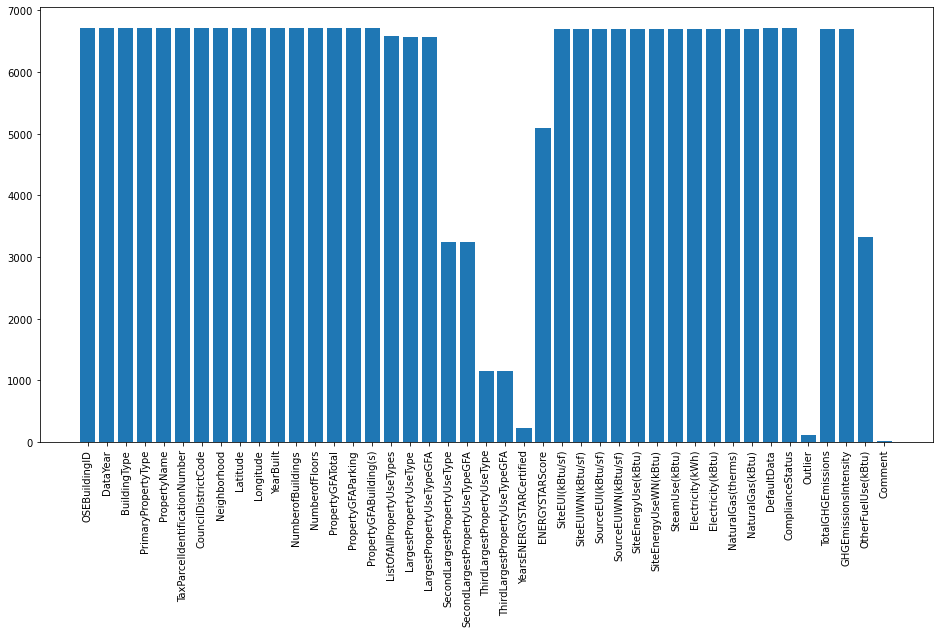

In [11]:
#On regarde la disponibilité des données par feature:
fig=plt.figure(figsize=(16,8))

x=[]
y=[]
a=rawdata.shape[0]
for i,value in rawdata.isnull().sum().items():
    y.append(a-value)
    x.append(i)

plt.bar(range(len(y)), y)
plt.xticks(range(len(x)), x,rotation=90)
        
plt.show()

In [12]:
#Il n'y a pas beaucoup de données manquantes
#On commence par les features avec peu de données: (Comment, Outlier et YearsENERGYSTARCertified)
#YearsENERGYSTARCertified ne nous est pas utile pour le problème recherché on la supprime:
del rawdata['YearsENERGYSTARCertified']

In [13]:
#On regarde les 2 autres:
print(rawdata.Outlier.unique())

for i in range(rawdata[-rawdata['Comment'].isnull()].shape[0]):
    print(rawdata[-rawdata['Comment'].isnull()].iloc[i,0])
    print(rawdata[-rawdata['Comment'].isnull()].iloc[i,-1])
    print('\n')

[nan 'High Outlier' 'Low Outlier' 'High outlier' 'Low outlier']
87
Under construction starting 6/2013 (old building demolished) and ending 9/2016. New Building re-opened 9/2016. Year built changed from 1948 to 2016.


594
Part of McKinstry's campus, property operates a fabrication and production shop and is conditioned by natural gas overhead radiant unit heaters with no cooling. Learn more at www.mckinstry.com.


595
One of two office buildings on McKinstry's campus partially remodeled in 2009 from warehouse to office space. Served by rooftop air handling units with underfloor VAVs.  Self-performed energy efficiency upgrades in 2015 include a long-term LED lighting re


792
Part of McKinstry’s campus, this remodeled warehouse is mainly office but includes a full-size basketball court and gym with locker rooms, bistro with a full kitchen, and data center. Served by rooftop package units for heating and cooling. Upgrades inclu


19694
Construction completed in mid 2015. The building was

In [14]:
#On conserve la colonne Outlier jusqu'à plus tard histoire de ne pas perdre qq données importantes
#Pour les commentaires, la majorité concernent des travaux en cours sur 2015 et 2016, on supprime ces données qui seront
#nécessairement biaisées puisque le batiment n'aura pas fonctionné normalement au cours de ces 2 années:

#Au final tous ceux qui ont des dates dans les commentaires font état de travaux en 2015 et 2016 
#on va donc supprimer tous les éléments qui ont '20' en commentaire

rawdata['Comment'].fillna('OK',inplace=True)
def replace(string):
    if '20' in string:
        string='x'
    return string

rawdata['Comment']=rawdata['Comment'].apply(lambda x: replace(x))

IDtodelete=rawdata[rawdata['Comment']=='x']['OSEBuildingID'].tolist()


rawdata=rawdata[-rawdata['OSEBuildingID'].isin(IDtodelete)]
#On supprime maintenant la colonne Comment
del rawdata['Comment']

In [15]:
#En regardant sur le site de la ville de Seattle on voit que les colonnes defaultData et Compliance Status
#concernent le calcul de l'Energy Star Score
#Le compliance status est inutile. On le supprime
#DefaultData signale que des données ont été renseignées par défault on garde pour le moment
del rawdata['ComplianceStatus']

In [16]:
rawdata.shape

(6699, 40)

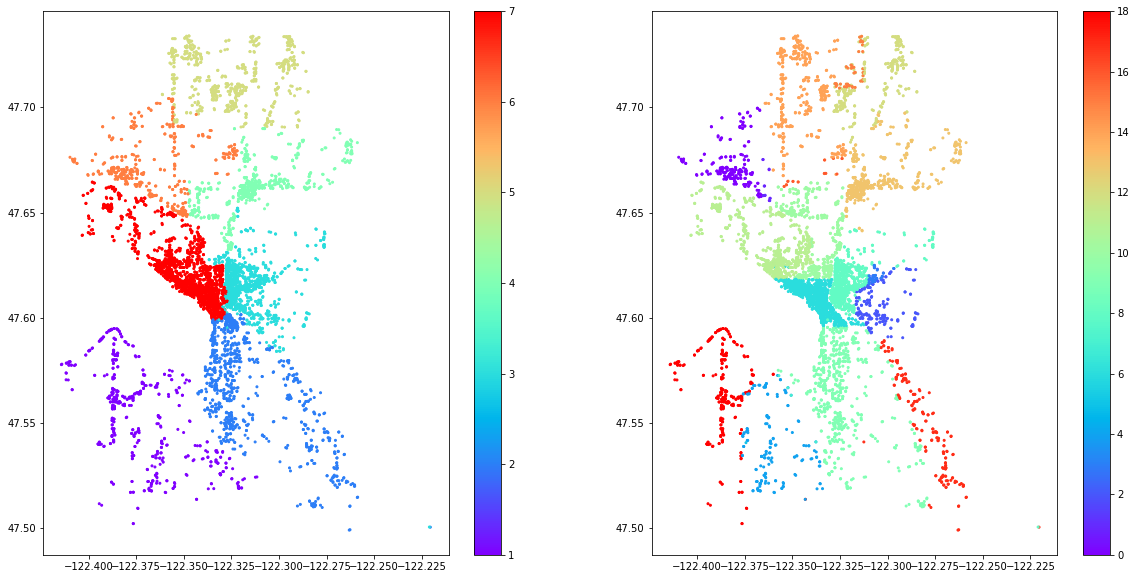

In [17]:
#On passe aux données géographiques:
df=rawdata[['Longitude','Latitude','CouncilDistrictCode','Neighborhood']].copy()
df.dropna(how='any',inplace=True)
#On vérifie que sont des découpages géographiques: Le country District Code, le Zip Code, le Neighborhood:
from sklearn.preprocessing import LabelEncoder

fig=plt.figure(figsize=(20,10))
plt.subplot(121)
x = df['Longitude'].astype(float)
y = df['Latitude'].astype(float)
tag=df['CouncilDistrictCode'] # Tag each point with a corresponding label  
# make the scatter 
plt.scatter(x,y,c=tag,cmap=plt.cm.rainbow,s=4,vmax=7) 
plt.colorbar()

plt.subplot(122)
encode=LabelEncoder()
x = df['Longitude'].astype(float)
y = df['Latitude'].astype(float)
tag=encode.fit_transform(df['Neighborhood']) # Tag each point with a corresponding label  
# make the scatter 
plt.scatter(x,y,c=tag,cmap=plt.cm.rainbow,s=4) 
plt.colorbar()

plt.show()

In [18]:
#C'est vraiment sectorisé dont redondant avec latitude et longitude, on supprime donc 'CouncilDistrictCode','Neighborhood'
#On supprime aussi le taxidentificationnumber qui est un numéro administratif:
rawdata.drop(['CouncilDistrictCode','Neighborhood','TaxParcelIdentificationNumber'],axis=1,inplace=True)

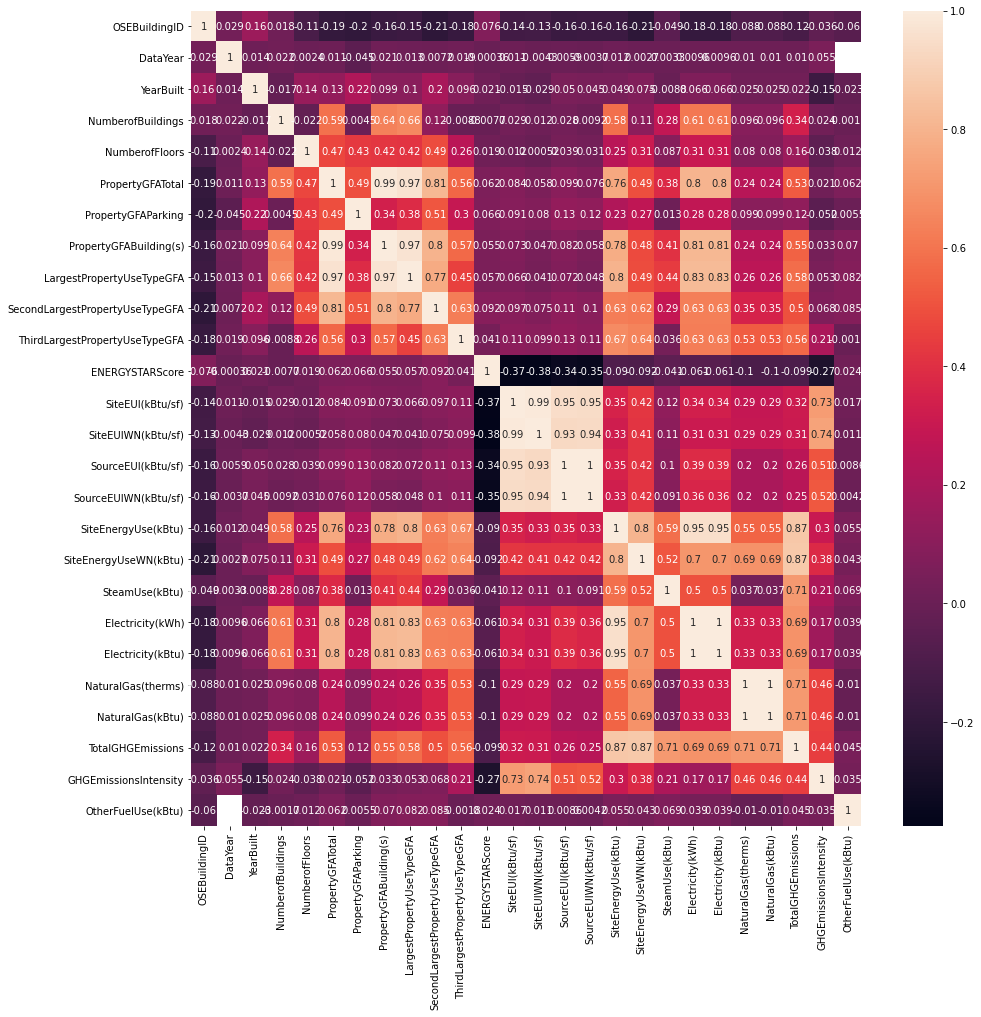

In [19]:
#On passe aux données chiffrées:
import seaborn as sn

corrMatrix = rawdata.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [20]:
#On ne conserve que les source d'énergie en kBtu pour être en cohérence avec SiteEnergyUse et ces données sont
#On a regardé au préalable qu'il n'y avait pas de données manquantes en kBtu disponibles en kWh ou therms 
#corrélés directement avec les autres, de la même manière on enlève aussi sourceEUIWN et sourceEUI
#En effet ces données sont les données d'énergie produite sur site plus les pertes de transport
#Nous on ne s'intéresse qu'aux données sur site:
rawdata.drop(['Electricity(kWh)','NaturalGas(therms)','SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)'],axis=1,inplace=True)

In [21]:
#On va enlever toutes les lignes n'ont rien en site enerygy use, siteenergy use WN et total ghg emission
#Dans la mesure où ce sont les données à prédire:

rawdata.dropna(subset=['SiteEnergyUse(kBtu)','SiteEnergyUseWN(kBtu)','TotalGHGEmissions'],how='all',inplace=True)
rawdata.shape

(6690, 33)

# Traitement des données catégorielles (strings)

## 'PrimaryPropertyType','LargestPropertyUseType' qui semblent être un peu la même chose

In [22]:
#On regarde les différents couples:
rawdata.columns
print(rawdata[['PrimaryPropertyType','LargestPropertyUseType']][rawdata['PrimaryPropertyType']!=rawdata['LargestPropertyUseType']].groupby(by=['PrimaryPropertyType','LargestPropertyUseType']).count())

Empty DataFrame
Columns: []
Index: [(Distribution Center
, Distribution Center), (High-Rise Multifamily, Multifamily Housing), (Hospital, Hospital (General Medical & Surgical)), (Large Office, Office), (Low-Rise Multifamily, Multifamily Housing), (Mid-Rise Multifamily, Multifamily Housing), (Mixed Use Property, Bank Branch), (Mixed Use Property, Distribution Center), (Mixed Use Property, Fitness Center/Health Club/Gym), (Mixed Use Property, Hotel), (Mixed Use Property, Laboratory), (Mixed Use Property, Medical Office), (Mixed Use Property, Multifamily Housing), (Mixed Use Property, Non-Refrigerated Warehouse), (Mixed Use Property, Office), (Mixed Use Property, Other), (Mixed Use Property, Other - Education), (Mixed Use Property, Other - Entertainment/Public Assembly), (Mixed Use Property, Other - Recreation), (Mixed Use Property, Other - Restaurant/Bar), (Mixed Use Property, Parking), (Mixed Use Property, Residence Hall/Dormitory), (Mixed Use Property, Restaurant), (Mixed Use Property,

In [23]:
#En dehors du couple (retail Store/other), le LargestPropertyUseType est toujours plus précis, 
#on va donc conserver ce dernier à moins que LargestPropertyUseType soit vide:

#Je fais les changement
rawdata['LargestPropertyUseType'] = rawdata.apply(lambda x: x['PrimaryPropertyType'] if \
        x['LargestPropertyUseType']!=x['LargestPropertyUseType'] else x['LargestPropertyUseType'],axis=1)
rawdata['LargestPropertyUseType'] = rawdata.apply(lambda x: x['PrimaryPropertyType'] if \
        x['LargestPropertyUseType']=='Other' and x['PrimaryPropertyType']=='Retail Store' else x['LargestPropertyUseType'],axis=1)
#Je supprime maintenant la colonne 'PrimaryPropertyType'
del rawdata['PrimaryPropertyType']



## On passe à BuildingType:

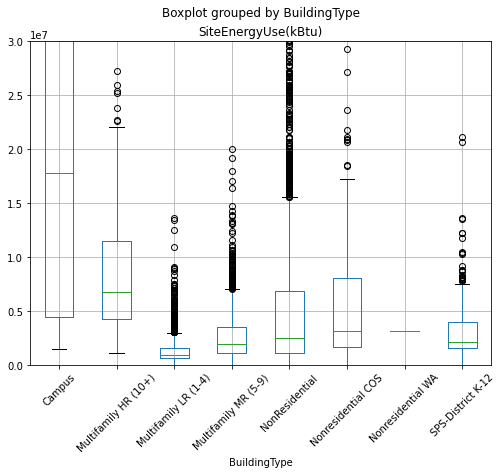

In [24]:
#On regarde les distributions des types 
a=rawdata.fillna(0)
axes=rawdata.boxplot(column='SiteEnergyUse(kBtu)',by='BuildingType',rot=45,figsize=(8,6))
axes.set_ylim(0, 30000000) 
plt.show()

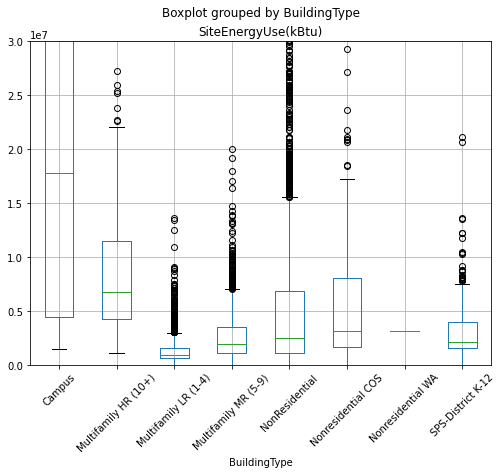

In [25]:
a=rawdata.fillna(0)
axes=rawdata.boxplot(column='SiteEnergyUse(kBtu)',by='BuildingType',rot=45,figsize=(8,6))
axes.set_ylim(0, 30000000) 
plt.show()

In [26]:
#Les différences sont importantes d'un type à l'autre.
#Néanmoins certaines sont explicables et corrélées directement à la taill comme les différents multifamily
#On va voir en regroupant en résidentiel/nonresidentiel:

#On fait un test ANOVA avant et après regroupement:
from scipy import stats
#Avant
b_types=rawdata['BuildingType'].unique().tolist()
d_data={b_type:rawdata['SiteEnergyUse(kBtu)'][rawdata['BuildingType']==b_type] for b_type in b_types}
f_avant,p_avant=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
#On change les catégories en plus simples:
anovadata=rawdata.copy()
d_types={'NonResidential':'NonResidential', 'Nonresidential COS':'NonResidential',\
         'Multifamily MR (5-9)':'Residential','SPS-District K-12':'NonResidential',\
         'Multifamily LR (1-4)':'Residential','Campus':'NonResidential',\
         'Multifamily HR (10+)':'Residential','Nonresidential WA':'NonResidential'}
anovadata['BuildingType']=anovadata['BuildingType'].apply(lambda x:d_types[x])

b2_types=anovadata['BuildingType'].unique().tolist()
d2_data={b_type:anovadata['SiteEnergyUse(kBtu)'][anovadata['BuildingType']==b_type] for b_type in b2_types}
f_apres,p_apres=stats.f_oneway(*[d2_data[key] for key in d2_data.keys()])

print('EnergyUse:')
print('f\n','Avant: ',f_avant, '\n','Apres: ',f_apres,'\np\n','Avant: ',p_avant, '\n','Apres: ',p_apres)

b_types=rawdata['BuildingType'].unique().tolist()
d_data={b_type:rawdata['TotalGHGEmissions'].fillna(0)[rawdata['BuildingType']==b_type] for b_type in b_types}
f_avant,p_avant=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
b2_types=anovadata['BuildingType'].unique().tolist()
d2_data={b_type:anovadata['TotalGHGEmissions'].fillna(0)[anovadata['BuildingType']==b_type] for b_type in b2_types}
f_apres,p_apres=stats.f_oneway(*[d2_data[key] for key in d2_data.keys()])

print('\nCO2:')
print('f\n','Avant: ',f_avant, '\n','Apres: ',f_apres,'\np\n','Avant: ',p_avant, '\n','Apres: ',p_apres)


EnergyUse:
f
 Avant:  91.18179848933141 
 Apres:  168.83993911369333 
p
 Avant:  1.8631655285672364e-127 
 Apres:  3.8289405873525044e-38

CO2:
f
 Avant:  71.21941984809548 
 Apres:  112.5049202004422 
p
 Avant:  9.757574957418255e-100 
 Apres:  4.45918631817082e-26


In [27]:
#Bilan: la catégorisation est pertinente:
rawdata['BuildingType']=rawdata['BuildingType'].apply(lambda x:d_types[x])


In [28]:
rawdata.BuildingType.unique()

array(['NonResidential', 'Residential'], dtype=object)

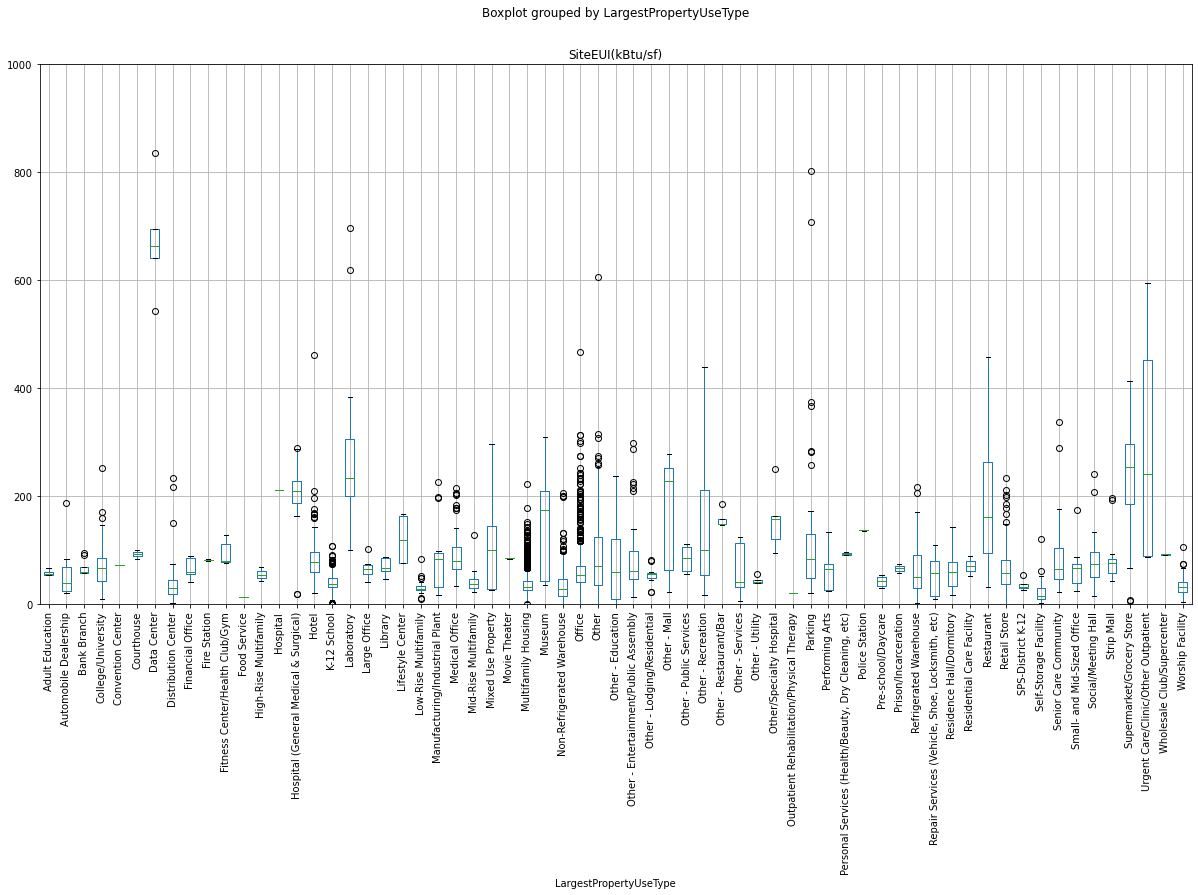

In [29]:
#Regardons maintenant les Largest, SecondLargest et ThirdLargest types:
axes=rawdata.boxplot(column='SiteEUI(kBtu/sf)',by='LargestPropertyUseType',rot=90,figsize=(20,10))
axes.set_ylim(0, 1000) 
plt.show()

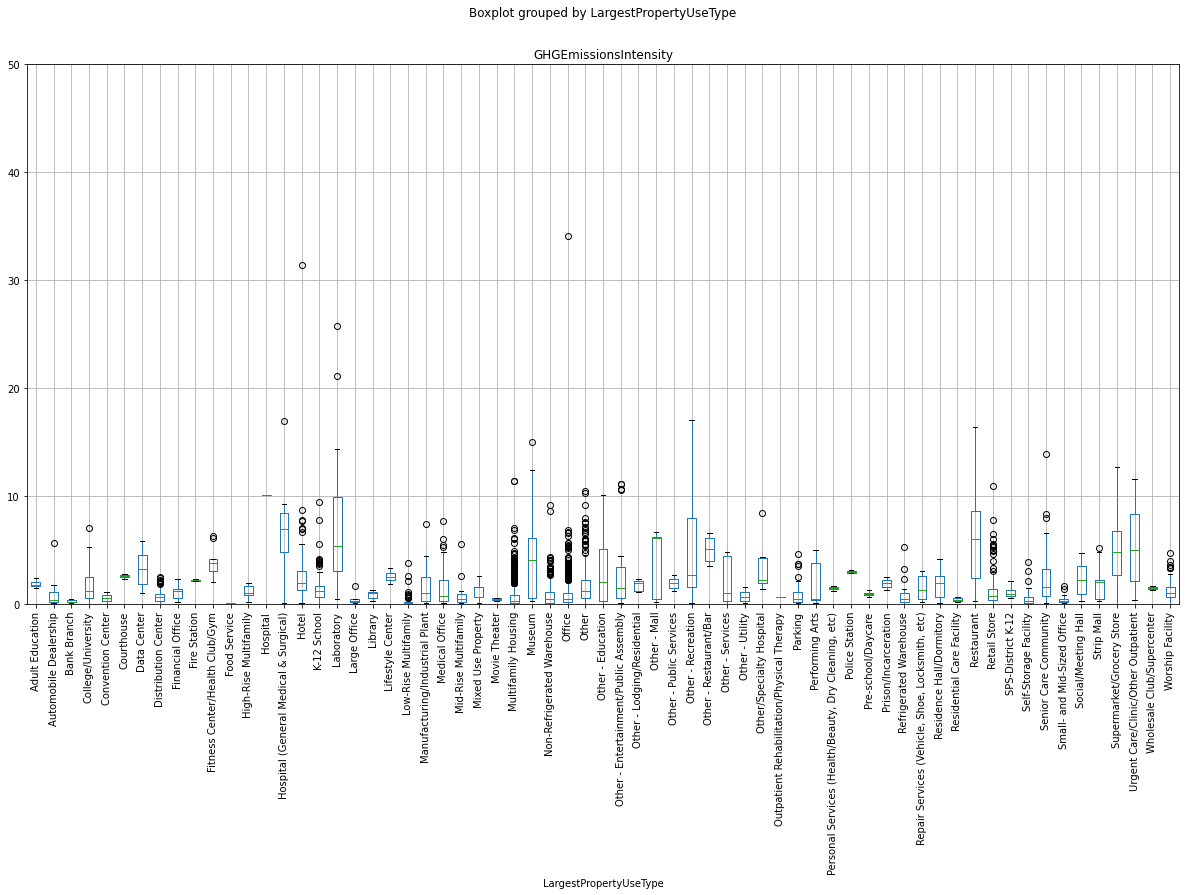

In [30]:
#Regardons maintenant les Largest, SecondLargest et ThirdLargest types:
axes=rawdata.boxplot(column='GHGEmissionsIntensity',by='LargestPropertyUseType',rot=90,figsize=(20,10))
axes.set_ylim(0, 50) 
plt.show()

In [31]:
#On voit des consomations importantes dans:
#Le médical et les DataCenter
#On va donc catégoriser en:
#High (DataCenter), middle(labo,hospital,restaurant,supermarché et mall et Museum) et other
#On rajoute quand même une catégorie parking pour nettoyer les parkings qui apparaissent sur toutes les colonnes:
p_types={'Hotel':'Other', 'Police Station':'Other', 'Other - Entertainment/Public Assembly':'Other',\
           'Multifamily Housing':'Other', 'Library':'Other', 'Fitness Center/Health Club/Gym':'Other',\
           'Social/Meeting Hall':'Other', 'Courthouse':'Other','Other':'Other', 'K-12 School':'Other',\
           'College/University':'Other', 'Automobile Dealership':'Other', 'Office':'Other',\
           'Self-Storage Facility':'Other', 'Distribution Center':'Other', 'Retail Store':'Other',\
           'Senior Care Community':'Other', 'Medical Office':'Middle', 'Hospital (General Medical & Surgical)':'Middle',\
           'Museum':'Middle', 'Repair Services (Vehicle, Shoe, Locksmith, etc)':'Other', 'Other - Lodging/Residential':'Other',\
           'Residence Hall/Dormitory':'Other', 'Other/Specialty Hospital':'Middle', 'Financial Office':'Other',\
           'Non-Refrigerated Warehouse':'Other', 'SPS-District K-12':'Other', 'Parking':'Parking',\
           'Worship Facility':'Other', 'Large Office':'Other', 'Small- and Mid-Sized Office':'Other',\
           'Laboratory':'Middle', 'Supermarket/Grocery Store':'Middle', 'Convention Center':'Other',\
           'Urgent Care/Clinic/Other Outpatient':'Middle', 'Mixed Use Property':'Other', 'Other - Services':'Other',\
           'Strip Mall':'Other', 'Wholesale Club/Supercenter':'Other', 'Refrigerated Warehouse':'Other',\
         'Other - Recreation':'Other', 'Lifestyle Center':'Other', 'Other - Public Services':'Other',\
         'Data Center':'High', 'Other - Mall':'Middle', 'Manufacturing/Industrial Plant':'Other',\
         'Restaurant':'Middle', 'Mid-Rise Multifamily':'Other', 'High-Rise Multifamily':'Other',\
         'Other - Education':'Other', 'Low-Rise Multifamily':'Other', 'Fire Station':'Other',\
         'Performing Arts':'Other', 'Residential Care Facility':'Other', 'Bank Branch':'Other',\
         'Other - Restaurant/Bar':'Other', 'Food Service':'Other', 'Adult Education':'Other',\
           'Other - Utility':'Other', 'Movie Theater':'Other', 'Outpatient Rehabilitation/Physical Therapy':'Middle',\
           'Personal Services (Health/Beauty, Dry Cleaning, etc)':'Other', 'Pre-school/Daycare':'Other',\
           'Hospital':'Middle', 'Prison/Incarceration':'Other', 'None':'None'}

In [32]:
#On change les catégories en plus simples:
anovadata['LargestPropertyUseType']=anovadata['LargestPropertyUseType'].apply(lambda x:p_types[x])

In [33]:

#Avant
b_types=rawdata['LargestPropertyUseType'].unique().tolist()
d_data={b_type:rawdata['SiteEnergyUse(kBtu)'][rawdata['LargestPropertyUseType']==b_type] for b_type in b_types}
f_avant,p_avant=stats.f_oneway(*[d_data[key] for key in d_data.keys()])

b2_types=anovadata['LargestPropertyUseType'].unique().tolist()
d2_data={b_type:anovadata['SiteEnergyUse(kBtu)'][anovadata['LargestPropertyUseType']==b_type] for b_type in b2_types}
f_apres,p_apres=stats.f_oneway(*[d2_data[key] for key in d2_data.keys()])

print('EnergyUse:')
print('f\n','Avant: ',f_avant, '\n','Apres: ',f_apres,'\np\n','Avant: ',p_avant, '\n','Apres: ',p_apres)

b_types=rawdata['LargestPropertyUseType'].unique().tolist()
d_data={b_type:rawdata['TotalGHGEmissions'].fillna(0)[rawdata['LargestPropertyUseType']==b_type] for b_type in b_types}
f_avant,p_avant=stats.f_oneway(*[d_data[key] for key in d_data.keys()])
b2_types=anovadata['LargestPropertyUseType'].unique().tolist()
d2_data={b_type:anovadata['TotalGHGEmissions'].fillna(0)[anovadata['LargestPropertyUseType']==b_type] for b_type in b2_types}
f_apres,p_apres=stats.f_oneway(*[d2_data[key] for key in d2_data.keys()])

print('\nCO2:')
print('f\n','Avant: ',f_avant, '\n','Apres: ',f_apres,'\np\n','Avant: ',p_avant, '\n','Apres: ',p_apres)


EnergyUse:
f
 Avant:  36.36682475940022 
 Apres:  176.3959600863128 
p
 Avant:  0.0 
 Apres:  4.5433730270526924e-110

CO2:
f
 Avant:  55.324081207276706 
 Apres:  123.91866942490752 
p
 Avant:  0.0 
 Apres:  4.1222507334308536e-78


In [34]:
#AInsi même en passant par la consommation au metre carré on reste pertinent sur les emissions totale et la conso totale
#On procède au changement dans LargestPropertyUseType
rawdata['LargestPropertyUseType']=rawdata['LargestPropertyUseType'].apply(lambda x:p_types[x])


In [35]:
print(rawdata[rawdata['LargestPropertyUseType'].isnull()]['SecondLargestPropertyUseTypeGFA'].unique())
print(rawdata[rawdata['LargestPropertyUseType'].isnull()]['ThirdLargestPropertyUseTypeGFA'].unique())

[]
[]


In [36]:
#On complète les autres colonnes Second et Third de la même manière:
#On impute au préalable les colonne Second et Third par des 'None' car on a aucune autre information
#sur les usages dans ces batiments
rawdata['SecondLargestPropertyUseType'].fillna('None',inplace=True)
rawdata['ThirdLargestPropertyUseType'].fillna('None',inplace=True)
#On récupère les types qui ne sont pas déja dans le répertoire p_types:
L=list(p_types.keys())
M=[]
for i in rawdata['SecondLargestPropertyUseType'].unique():
    if i not in L:
        M.append(i)
for i in rawdata['ThirdLargestPropertyUseType'].unique():
    if i not in L and i not in M:
        M.append(i)

M

['Vocational School',
 'Swimming Pool',
 'Convenience Store without Gas Station',
 'Bar/Nightclub',
 'Food Sales',
 'Enclosed Mall',
 'Other - Technology/Science',
 'Fast Food Restaurant']

In [37]:
#On met tout en Other, le second use compte beaucoup moins que le first et cela ne concerne que 100 items:
for i in M:
    p_types[i]='Other'
#On remplace tous les élément de Second et Third avec le dictionnaire:
rawdata['SecondLargestPropertyUseType']=rawdata['SecondLargestPropertyUseType'].apply(lambda x:p_types[x])
rawdata['ThirdLargestPropertyUseType']=rawdata['ThirdLargestPropertyUseType'].apply(lambda x:p_types[x])
#On vérifie
print(rawdata['LargestPropertyUseType'].unique(),rawdata['SecondLargestPropertyUseType'].unique(),rawdata['ThirdLargestPropertyUseType'].unique())


['Other' 'Middle' 'Parking' 'High'] ['None' 'Parking' 'Other' 'Middle' 'High'] ['None' 'Middle' 'Other' 'High' 'Parking']


In [38]:
#Maintenant on s'occupe des parking que l'on retrouve à la fois en Parking, Largest, SecondLargest et ThirdLargest
#On peut vérifier que l'on a toujours PropertyGFATotal=PropertyGFAParking+PropertyGFABuilding(s)

#Donc on va considérer que ces données sont relativement fiable donc
#Si on trouve Paring en Largest, on met ce qui est en second en Largest et ce qui est en third en second
#Si la colonne PropertyGFAParking est à 0 on la remplace par la colonne LargestPropertyUsedGFA et on l'ajoute
#à PropertyGFATotal sinon on laisse comme tel.

#Je défini une fonction qui me fait cela sur les lignes:
def transform(row):
#Si parking est dans FirstLargest, je mets ce qui est dans second en first et ce qui est en third en second et \
#Je mets Third a zeros
    if row['LargestPropertyUseType']=='Parking':
        row['LargestPropertyUseType']=row['SecondLargestPropertyUseType']
        row['SecondLargestPropertyUseType']=row['ThirdLargestPropertyUseType']
        row['ThirdLargestPropertyUseType']='None'
#Si je n'avais aucune info en parking je rempli avec la valeur en first et je mets a jour la surface de la
#propriété totale
        if row['PropertyGFAParking']==0:
            row['PropertyGFAParking']=row['LargestPropertyUseTypeGFA']
            row['PropertyGFATotal']+=row['PropertyGFAParking']
        row['LargestPropertyUseTypeGFA']=row['SecondLargestPropertyUseTypeGFA']
        row['SecondLargestPropertyUseTypeGFA']=row['ThirdLargestPropertyUseTypeGFA']
        row['ThirdLargestPropertyUseTypeGFA']=0
#Je fais pareil si j'ai parking en second
    elif row['SecondLargestPropertyUseType']=='Parking':
        row['SecondLargestPropertyUseType']=row['ThirdLargestPropertyUseType']
        row['ThirdLargestPropertyUseType']='None'
        if row['PropertyGFAParking']==0:
            row['PropertyGFAParking']=row['SecondLargestPropertyUseTypeGFA']
            row['PropertyGFATotal']+=row['PropertyGFAParking']
        row['SecondLargestPropertyUseTypeGFA']=row['ThirdLargestPropertyUseTypeGFA']
        row['ThirdLargestPropertyUseTypeGFA']=0
#Je fais pareil si j'ai parking en third
    elif row['ThirdLargestPropertyUseType']=='Parking':
        row['ThirdLargestPropertyUseType']='None'
        if row['PropertyGFAParking']==0:
            row['PropertyGFAParking']=row['ThirdLargestPropertyUseTypeGFA']
            row['PropertyGFATotal']+=row['PropertyGFAParking']
        row['ThirdLargestPropertyUseTypeGFA']=0
    return row



In [39]:
#J'applique la fonction à mon dataframe:
rawdata=rawdata.apply(lambda row: transform(row), axis=1)
rawdata.shape

(6690, 32)

In [40]:
for i in ['BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']:
    print(i,rawdata[i].unique())

BuildingType ['NonResidential' 'Residential']
LargestPropertyUseType ['Other' 'Middle' 'High']
SecondLargestPropertyUseType ['None' 'Middle' 'Other' 'High' 'Parking']
ThirdLargestPropertyUseType ['None' 'Other' 'High' 'Middle']


In [41]:
#Il y a encore du parking en second donc il devait y avoir parking en second et third dans un item:
#On rapplique la fonction:
rawdata=rawdata.apply(lambda row: transform(row), axis=1)
for i in ['BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']:
    print(i,rawdata[i].unique())

BuildingType ['NonResidential' 'Residential']
LargestPropertyUseType ['Other' 'Middle' 'High']
SecondLargestPropertyUseType ['None' 'Middle' 'Other' 'High']
ThirdLargestPropertyUseType ['None' 'Other' 'High' 'Middle']


# Valeurs Manquantes et valeur dupliquées

In [42]:
#Avant de réduire plus la dimension du problème on va traité les valeurs dupliquées et les valeurs manquantes:
#On a beaucoup de batiments de 2015 et 2016 qui sont les mêmes:
#On va se servir de celles-ci pour remplir les valeurs manquantes de certaines années
#On va également commencer à traiter les outliers

#On divise notre base de donnée en 2:

df=rawdata[rawdata.duplicated(subset=['OSEBuildingID'],keep=False)].sort_values(by='OSEBuildingID').copy()
nondupl=rawdata[-rawdata.duplicated(subset=['OSEBuildingID'],keep=False)].sort_values(by='OSEBuildingID').copy()
dupl2015=df[df.DataYear==2015].copy()
dupl2016=df[df.DataYear==2016].copy()

print(nondupl.shape,dupl2015.shape,dupl2016.shape)

(152, 32) (3269, 32) (3269, 32)


In [43]:
dupl2015.head()

,OSEBuildingID,DataYear,BuildingType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
0,1,2015,NonResidential,MAYFLOWER PARK HOTEL,47.61219025,-122.33799744,1927,1.0,12.0,88434.0,...,6981428.0,7097539.0,2023032.0,3686160.0,1272388.0,No,NaN,249.43,2.64,0.0
1,2,2015,NonResidential,PARAMOUNT HOTEL,47.61310583,-122.33335756,1996,1.0,11.0,103566.0,...,8354235.0,8765788.0,0.0,3905411.0,4448985.0,No,NaN,263.51,2.38,0.0
2,3,2015,NonResidential,WESTIN HOTEL,47.61334897,-122.33769944,1969,1.0,41.0,1061990.0,...,73130656.0,75506272.0,19660404.0,49762435.0,3709900.0,Yes,NaN,2061.48,1.92,0.0
3,5,2015,NonResidential,HOTEL MAX,47.61421585,-122.33660889,1926,1.0,10.0,61320.0,...,28229320.0,28363444.0,23458518.0,2769023.0,2001894.0,No,High Outlier,1936.34,31.38,0.0
4,8,2015,NonResidential,WARWICK SEATTLE HOTEL,47.6137544,-122.3409238,1980,1.0,18.0,119890.0,...,14829099.0,15078243.0,0.0,6066245.0,8763105.0,No,NaN,507.70,4.02,0.0


In [44]:
dupl2016.head()

,OSEBuildingID,DataYear,BuildingType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
0,1,2016,NonResidential,Mayflower park hotel,47.6122,-122.338,1927,1.0,12.0,88434.0,...,7226362.5,7456910.0,2003882.00,3946027.0,1276453.0,False,NaN,249.98,2.83,NaN
1,2,2016,NonResidential,Paramount Hotel,47.6132,-122.334,1996,1.0,11.0,103566.0,...,8387933.0,8664479.0,0.00,3242851.0,5145082.0,False,NaN,295.86,2.86,NaN
2,3,2016,NonResidential,5673-The Westin Seattle,47.6139,-122.338,1969,1.0,41.0,956110.0,...,72587024.0,73937112.0,21566554.00,49526664.0,1493800.0,False,NaN,2089.28,2.19,NaN
3,5,2016,NonResidential,HOTEL MAX,47.6141,-122.337,1926,1.0,10.0,61320.0,...,6794584.0,6946800.5,2214446.25,2768924.0,1811213.0,False,NaN,286.43,4.67,NaN
4,8,2016,NonResidential,WARWICK SEATTLE HOTEL (ID8),47.6138,-122.34,1980,1.0,18.0,175580.0,...,14172606.0,14656503.0,0.00,5368607.0,8803998.0,False,NaN,505.01,2.88,NaN


In [45]:
#On joint les deux tableaux sur la colonne OSEBuilding et on réorganise pour mettre les colonnes similaire cote a cote:
dupl=pd.merge(dupl2015,dupl2016,on='OSEBuildingID',suffixes=('_15','_16'))
L=['OSEBuildingID']
for i in dupl2015.columns.tolist()[1:]:
    L+=[i+'_15',i+'_16']
dupl=dupl[L]
print(dupl.shape,dupl.columns)

(3269, 63) Index(['OSEBuildingID', 'DataYear_15', 'DataYear_16', 'BuildingType_15',
       'BuildingType_16', 'PropertyName_15', 'PropertyName_16', 'Latitude_15',
       'Latitude_16', 'Longitude_15', 'Longitude_16', 'YearBuilt_15',
       'YearBuilt_16', 'NumberofBuildings_15', 'NumberofBuildings_16',
       'NumberofFloors_15', 'NumberofFloors_16', 'PropertyGFATotal_15',
       'PropertyGFATotal_16', 'PropertyGFAParking_15', 'PropertyGFAParking_16',
       'PropertyGFABuilding(s)_15', 'PropertyGFABuilding(s)_16',
       'ListOfAllPropertyUseTypes_15', 'ListOfAllPropertyUseTypes_16',
       'LargestPropertyUseType_15', 'LargestPropertyUseType_16',
       'LargestPropertyUseTypeGFA_15', 'LargestPropertyUseTypeGFA_16',
       'SecondLargestPropertyUseType_15', 'SecondLargestPropertyUseType_16',
       'SecondLargestPropertyUseTypeGFA_15',
       'SecondLargestPropertyUseTypeGFA_16', 'ThirdLargestPropertyUseType_15',
       'ThirdLargestPropertyUseType_16', 'ThirdLargestPropertyUseTypeGF

In [46]:
#On regarde les cohérence colonne par colonne et on corrige en fonction

### BuildingType

In [47]:
dupl[dupl['BuildingType_15']!=dupl['BuildingType_16']][['PropertyName_15','PropertyName_16','BuildingType_15','BuildingType_16','LargestPropertyUseType_15','LargestPropertyUseType_16']]


,PropertyName_15,PropertyName_16,BuildingType_15,BuildingType_16,LargestPropertyUseType_15,LargestPropertyUseType_16
955,WASHINGTON CARE CENTER,Washington Care Center,Residential,NonResidential,Other,Other


In [48]:
#Features inutile, on prend les valeurs de 2015:
dupl['BuildingType']=dupl['BuildingType_16']
#On supprime les colonnes 15 et 16
dupl.drop(['BuildingType_15','BuildingType_16'],axis=1,inplace=True)

### PropertyName

In [49]:
#On garde 2016 ça colle plus avec le PropertyName
dupl['PropertyName']=dupl['PropertyName_15']
#On supprime les colonnes 15 et 16
dupl.drop(['PropertyName_15','PropertyName_16'],axis=1,inplace=True)

### Coordonnées GPS

In [50]:
dupl['Latitude_15']=dupl['Latitude_15'].astype(float)
dupl['Latitude_16']=dupl['Latitude_16'].astype(float)
dupl['Longitude_15']=dupl['Longitude_15'].astype(float)
dupl['Longitude_16']=dupl['Longitude_16'].astype(float)
a=dupl['Latitude_15']-dupl['Latitude_16']
a.describe()

count    3.269000e+03
mean     2.725478e-05
std      1.038004e-03
min     -2.157293e-02
25%     -6.577000e-05
50%     -4.700000e-07
75%      6.051000e-05
max      2.291062e-02
dtype: float64

In [51]:
b=dupl['Longitude_15']-dupl['Longitude_16']
b.describe()

count    3269.000000
mean       -0.000021
std         0.001030
min        -0.026728
25%        -0.000069
50%         0.000006
75%         0.000096
max         0.004505
dtype: float64

In [52]:
#On a qq valeurs qui ne collent pas entre les 2 relevés de GPS on va supprimer 
#toutes celles qui diffèrent de plus de 0.005:
#Ensuite on prendra la moyenne des deux valeurs pour la valeur de référence:
print(dupl.shape)
dupl=dupl[abs(dupl['Longitude_15']-dupl['Longitude_16'])<0.005]
dupl=dupl[abs(dupl['Latitude_15']-dupl['Latitude_16'])<0.005]
print(dupl.shape)


(3269, 61)
(3262, 61)


In [53]:
dupl['Latitude'] = dupl.apply(lambda x: x['Latitude_16'] if \
        #En 2015 si il n'y a rien on prend la valeur de 2016
        x['Latitude_15']!=x['Latitude_15'] else\
        #Sinon on garde 2015 si 2016 vaut
        (x['Latitude_15'] if x['Latitude_16']!=x['Latitude_16'] else (x['Latitude_15']+x['Latitude_16'])/2),axis=1)

dupl['Longitude'] = dupl.apply(lambda x: x['Longitude_16'] if \
        #En 2015 si il n'y a rien on prend la valeur de 2016
        x['Longitude_15']!=x['Longitude_15'] else\
        #Sinon on garde 2015 si 2016 vaut
        (x['Longitude_15'] if x['Longitude_16']!=x['Longitude_16'] else (x['Longitude_15']+x['Longitude_16'])/2),axis=1)

#On supprime les colonne 'Latitude_15','Latitude_16','Longitude_15','Longitude_16'
del dupl['Latitude_15']
del dupl['Latitude_16']
del dupl['Longitude_15']
del dupl['Longitude_16']


### YearBuilt

In [54]:
dupl[dupl['YearBuilt_15']!=dupl['YearBuilt_16']]

,OSEBuildingID,DataYear_15,DataYear_16,YearBuilt_15,YearBuilt_16,NumberofBuildings_15,NumberofBuildings_16,NumberofFloors_15,NumberofFloors_16,PropertyGFATotal_15,...,TotalGHGEmissions_15,TotalGHGEmissions_16,GHGEmissionsIntensity_15,GHGEmissionsIntensity_16,OtherFuelUse(kBtu)_15,OtherFuelUse(kBtu)_16,BuildingType,PropertyName,Latitude,Longitude


In [55]:
#Aucune différence, on garde une des deux:
dupl['YearBuilt']=dupl['YearBuilt_16']
#On supprime les colonnes 15 et 16
dupl.drop(['YearBuilt_15','YearBuilt_16'],axis=1,inplace=True)

### Number of Floors et Number of Buildings:

In [56]:
print(dupl[dupl['NumberofBuildings_15']!=dupl['NumberofBuildings_16']].shape,\
     dupl[dupl['NumberofFloors_15']!=dupl['NumberofFloors_16']].shape)

(188, 58) (6, 58)


In [57]:
#Les données sont succeptibles d'avoir de l'importance, plus il y a de buildings plus ca doit consommer
#Plus il y a d'étages et moins cela doit consommer
#on n'a que 194 lignes sur 3200, on les supprime
print(dupl.shape)
dupl=dupl[-(dupl['NumberofBuildings_15']!=dupl['NumberofBuildings_16'])]
print(dupl.shape)
dupl=dupl[-(dupl['NumberofFloors_15']!=dupl['NumberofFloors_16'])]
print(dupl.shape)
#On prend la valeur de l'une des deux colonnes qui sont identiques:
dupl['NumberofBuildings']=dupl['NumberofBuildings_16']
dupl['NumberofFloors']=dupl['NumberofFloors_16']
dupl.drop(['NumberofBuildings_15','NumberofBuildings_16','NumberofFloors_15','NumberofFloors_16'],axis=1,inplace=True)

(3262, 58)
(3074, 58)
(3069, 58)


### Les Surfaces des batiments

In [58]:
dupl[['PropertyGFATotal_15', 'PropertyGFATotal_16', 'PropertyGFAParking_15',
       'PropertyGFAParking_16', 'PropertyGFABuilding(s)_15',
       'PropertyGFABuilding(s)_16', 'LargestPropertyUseTypeGFA_15',
       'LargestPropertyUseTypeGFA_16', 'SecondLargestPropertyUseTypeGFA_15',
       'SecondLargestPropertyUseTypeGFA_16', 'ThirdLargestPropertyUseTypeGFA_15',
       'ThirdLargestPropertyUseTypeGFA_16']].describe()

,PropertyGFATotal_15,PropertyGFATotal_16,PropertyGFAParking_15,PropertyGFAParking_16,PropertyGFABuilding(s)_15,PropertyGFABuilding(s)_16,LargestPropertyUseTypeGFA_15,LargestPropertyUseTypeGFA_16,SecondLargestPropertyUseTypeGFA_15,SecondLargestPropertyUseTypeGFA_16,ThirdLargestPropertyUseTypeGFA_15,ThirdLargestPropertyUseTypeGFA_16
count,3.069000e+03,3.069000e+03,3069.000000,3069.000000,3.069000e+03,3.069000e+03,2.968000e+03,3.060000e+03,853.000000,879.000000,1111.000000,1179.000000
mean,9.040350e+04,9.315345e+04,13672.691756,13022.011079,7.673081e+04,8.013144e+04,7.132832e+04,7.203732e+04,14350.321219,14291.841181,1143.833483,1059.163104
std,1.475235e+05,1.522697e+05,40934.452691,40630.487066,1.165902e+05,1.216955e+05,1.120705e+05,1.122953e+05,28084.121205,28441.660927,4126.877290,3971.773856
min,2.000000e+04,1.630000e+04,-3.000000,0.000000,-5.055000e+04,3.636000e+03,5.872000e+03,5.656000e+03,0.000000,0.000000,0.000000,0.000000
25%,2.880000e+04,2.907900e+04,0.000000,0.000000,2.657900e+04,2.760000e+04,2.490075e+04,2.499700e+04,3910.000000,3753.500000,0.000000,0.000000
50%,4.408600e+04,4.484500e+04,0.000000,0.000000,4.101300e+04,4.225200e+04,3.842300e+04,3.886500e+04,7620.000000,7500.000000,0.000000,0.000000
75%,8.843400e+04,9.152000e+04,8313.000000,6786.000000,7.609400e+04,7.980500e+04,6.986075e+04,7.066075e+04,14257.000000,14238.000000,0.000000,0.000000
max,2.086750e+06,2.086750e+06,686750.000000,686750.000000,1.632820e+06,1.632820e+06,1.680937e+06,1.680937e+06,345702.000000,380639.000000,80000.000000,80000.000000


In [59]:
#Je commence par remplacer les nan éventuels par la valeur de l'autre année
dupl['LargestPropertyUseTypeGFA_16']=np.where(dupl['LargestPropertyUseTypeGFA_16']!=dupl['LargestPropertyUseTypeGFA_16'],dupl['LargestPropertyUseTypeGFA_15'],dupl['LargestPropertyUseTypeGFA_16'])
dupl['LargestPropertyUseTypeGFA_15']=np.where(dupl['LargestPropertyUseTypeGFA_15']!=dupl['LargestPropertyUseTypeGFA_15'],dupl['LargestPropertyUseTypeGFA_16'],dupl['LargestPropertyUseTypeGFA_15'])

dupl['SecondLargestPropertyUseTypeGFA_16']=np.where(dupl['SecondLargestPropertyUseTypeGFA_16']!=dupl['SecondLargestPropertyUseTypeGFA_16'],dupl['SecondLargestPropertyUseTypeGFA_15'],dupl['SecondLargestPropertyUseTypeGFA_16'])
dupl['SecondLargestPropertyUseTypeGFA_15']=np.where(dupl['SecondLargestPropertyUseTypeGFA_15']!=dupl['SecondLargestPropertyUseTypeGFA_15'],dupl['SecondLargestPropertyUseTypeGFA_16'],dupl['SecondLargestPropertyUseTypeGFA_15'])

dupl['ThirdLargestPropertyUseTypeGFA_16']=np.where(dupl['ThirdLargestPropertyUseTypeGFA_16']!=dupl['ThirdLargestPropertyUseTypeGFA_16'],dupl['ThirdLargestPropertyUseTypeGFA_15'],dupl['ThirdLargestPropertyUseTypeGFA_16'])
dupl['ThirdLargestPropertyUseTypeGFA_15']=np.where(dupl['ThirdLargestPropertyUseTypeGFA_15']!=dupl['ThirdLargestPropertyUseTypeGFA_15'],dupl['ThirdLargestPropertyUseTypeGFA_16'],dupl['ThirdLargestPropertyUseTypeGFA_15'])
#On remplace les nan restants de 'LargestProperty' par TotalGFABuilding
dupl['LargestPropertyUseTypeGFA_16']=np.where(dupl['LargestPropertyUseTypeGFA_16']!=dupl['LargestPropertyUseTypeGFA_16'],dupl['PropertyGFABuilding(s)_16'],dupl['LargestPropertyUseTypeGFA_16'])
dupl['LargestPropertyUseTypeGFA_15']=np.where(dupl['LargestPropertyUseTypeGFA_15']!=dupl['LargestPropertyUseTypeGFA_15'],dupl['PropertyGFABuilding(s)_15'],dupl['LargestPropertyUseTypeGFA_15'])


In [60]:
dupl[['PropertyGFATotal_15', 'PropertyGFATotal_16', 'PropertyGFAParking_15',
       'PropertyGFAParking_16', 'PropertyGFABuilding(s)_15',
       'PropertyGFABuilding(s)_16', 'LargestPropertyUseTypeGFA_15',
       'LargestPropertyUseTypeGFA_16', 'SecondLargestPropertyUseTypeGFA_15',
       'SecondLargestPropertyUseTypeGFA_16', 'ThirdLargestPropertyUseTypeGFA_15',
       'ThirdLargestPropertyUseTypeGFA_16']].isnull().sum()

PropertyGFATotal_15                      0
PropertyGFATotal_16                      0
PropertyGFAParking_15                    0
PropertyGFAParking_16                    0
PropertyGFABuilding(s)_15                0
PropertyGFABuilding(s)_16                0
LargestPropertyUseTypeGFA_15             0
LargestPropertyUseTypeGFA_16             0
SecondLargestPropertyUseTypeGFA_15    2186
SecondLargestPropertyUseTypeGFA_16    2186
ThirdLargestPropertyUseTypeGFA_15     1884
ThirdLargestPropertyUseTypeGFA_16     1884
dtype: int64

In [61]:
#On regarde les valeurs négatives:
dupl[dupl['PropertyGFAParking_15']<0][['PropertyGFATotal_15', 'PropertyGFATotal_16', 'PropertyGFAParking_15',
       'PropertyGFAParking_16', 'PropertyGFABuilding(s)_15',
       'PropertyGFABuilding(s)_16', 'LargestPropertyUseTypeGFA_15',
       'LargestPropertyUseTypeGFA_16', 'SecondLargestPropertyUseTypeGFA_15',
       'SecondLargestPropertyUseTypeGFA_16', 'ThirdLargestPropertyUseTypeGFA_15',
       'ThirdLargestPropertyUseTypeGFA_16']]

,PropertyGFATotal_15,PropertyGFATotal_16,PropertyGFAParking_15,PropertyGFAParking_16,PropertyGFABuilding(s)_15,PropertyGFABuilding(s)_16,LargestPropertyUseTypeGFA_15,LargestPropertyUseTypeGFA_16,SecondLargestPropertyUseTypeGFA_15,SecondLargestPropertyUseTypeGFA_16,ThirdLargestPropertyUseTypeGFA_15,ThirdLargestPropertyUseTypeGFA_16
2375,20967.0,20967.0,-3.0,0.0,20970,20967,20967.0,20967.0,NaN,NaN,NaN,NaN
3067,68452.0,68452.0,-2.0,0.0,68454,68452,61665.0,61665.0,6787.0,6787.0,NaN,NaN


In [62]:
#On va juste mettre ces valeurs à 0:
dupl['PropertyGFAParking_15']=np.where(dupl['PropertyGFAParking_15']<0,0,dupl['PropertyGFAParking_15'])

In [63]:
dupl[dupl['PropertyGFABuilding(s)_15']<0][['PropertyGFATotal_15', 'PropertyGFATotal_16', 'PropertyGFAParking_15',
       'PropertyGFAParking_16', 'PropertyGFABuilding(s)_15',
       'PropertyGFABuilding(s)_16', 'LargestPropertyUseTypeGFA_15',
       'LargestPropertyUseTypeGFA_16','LargestPropertyUseType_15',
       'LargestPropertyUseType_16', 'SecondLargestPropertyUseTypeGFA_15',
       'SecondLargestPropertyUseTypeGFA_16', 'ThirdLargestPropertyUseTypeGFA_15',
       'ThirdLargestPropertyUseTypeGFA_16']]

,PropertyGFATotal_15,PropertyGFATotal_16,PropertyGFAParking_15,PropertyGFAParking_16,PropertyGFABuilding(s)_15,PropertyGFABuilding(s)_16,LargestPropertyUseTypeGFA_15,LargestPropertyUseTypeGFA_16,LargestPropertyUseType_15,LargestPropertyUseType_16,SecondLargestPropertyUseTypeGFA_15,SecondLargestPropertyUseTypeGFA_16,ThirdLargestPropertyUseTypeGFA_15,ThirdLargestPropertyUseTypeGFA_16
3070,54015.0,54015.0,97325.0,0.0,-43310,54015,54015.0,54015.0,Other,Other,NaN,NaN,NaN,NaN
3251,33648.0,117248.0,84198.0,83600.0,-50550,33648,39000.0,39000.0,Other,Other,NaN,NaN,0.0,0.0


In [64]:
#celles ci, on les supprime:
print(dupl.shape)
dupl=dupl[-(dupl['PropertyGFABuilding(s)_15']<0)]
print(dupl.shape)

(3069, 56)
(3067, 56)


/home/samuel/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/samuel/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


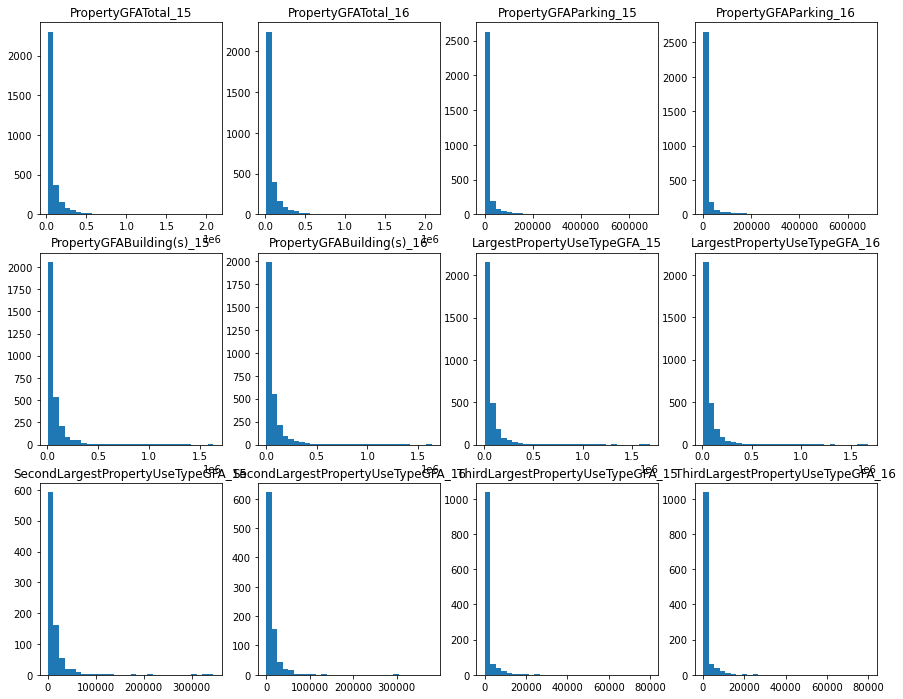

In [65]:
#On va supprimer les outliers:
L=['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
plt.figure(figsize=(15,12))
k=1
for i in L:
    i15=i+'_15'
    i16=i+'_16'
    plt.subplot(3,4,k)
    plt.hist(dupl[i15],bins=30)
    plt.title(i15)
    k+=1
    plt.subplot(3,4,k)
    plt.hist(dupl[i16],bins=30)
    plt.title(i16)
    k+=1

In [66]:
outliers={'PropertyGFATotal':[0,800000],'PropertyGFAParking':[0,250000],'PropertyGFABuilding(s)':[0,600000],\
         'LargestPropertyUseTypeGFA':[0,600000],'SecondLargestPropertyUseTypeGFA':[0,100000],\
         'ThirdLargestPropertyUseTypeGFA':[0,30000]}
for i in L:
    i15=i+'_15'
    i16=i+'_16'
    dupl=dupl[-(dupl[i15]<outliers[i][0])]
    dupl=dupl[-(dupl[i15]>outliers[i][1])]
    dupl=dupl[-(dupl[i16]<outliers[i][0])]
    dupl=dupl[-(dupl[i16]>outliers[i][1])]
print(dupl.shape)

(3017, 56)


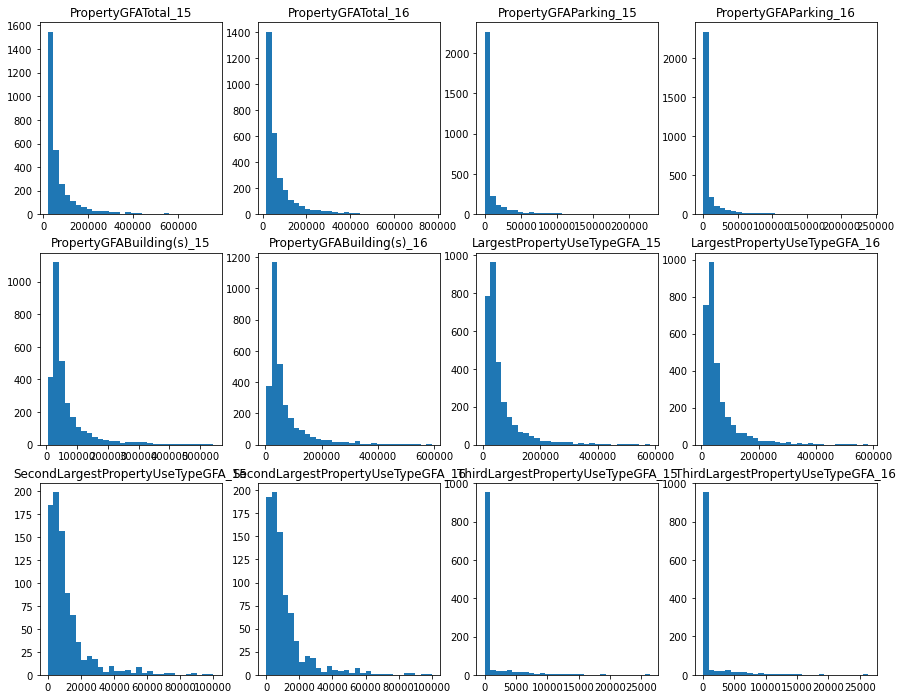

In [67]:
#On affine petit à petit:
L=['PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']
plt.figure(figsize=(15,12))
k=1
for i in L:
    i15=i+'_15'
    i16=i+'_16'
    plt.subplot(3,4,k)
    plt.hist(dupl[i15],bins=30)
    plt.title(i15)
    k+=1
    plt.subplot(3,4,k)
    plt.hist(dupl[i16],bins=30)
    plt.title(i16)
    k+=1

In [68]:
#On prend maintenant la valeur moyenne des données restantes:
dupl['PropertyGFATotal']=(dupl['PropertyGFATotal_15']+dupl['PropertyGFATotal_16'])/2
dupl['PropertyGFAParking']=(dupl['PropertyGFAParking_15']+dupl['PropertyGFAParking_16'])/2
dupl['PropertyGFABuilding(s)']=(dupl['PropertyGFABuilding(s)_15']+dupl['PropertyGFABuilding(s)_16'])/2
dupl['LargestPropertyUseTypeGFA']=(dupl['LargestPropertyUseTypeGFA_15']+dupl['LargestPropertyUseTypeGFA_16'])/2
dupl['SecondLargestPropertyUseTypeGFA']=(dupl['SecondLargestPropertyUseTypeGFA_15']+dupl['SecondLargestPropertyUseTypeGFA_16'])/2
dupl['ThirdLargestPropertyUseTypeGFA']=(dupl['ThirdLargestPropertyUseTypeGFA_15']+dupl['ThirdLargestPropertyUseTypeGFA_16'])/2


In [69]:
#On supprime les 2015 et 2016:
for i in L:
    i15=i+'_15'
    i16=i+'_16'
    del dupl[i15]
    del dupl[i16]

### Property Types:

In [70]:
#On remplace les None par la valeur d'à coté:
dupl['SecondLargestPropertyUseType_15']=np.where(dupl['SecondLargestPropertyUseType_15']=='None',dupl['SecondLargestPropertyUseType_16'],dupl['SecondLargestPropertyUseType_15'])
dupl['SecondLargestPropertyUseType_16']=np.where(dupl['SecondLargestPropertyUseType_16']=='None',dupl['SecondLargestPropertyUseType_15'],dupl['SecondLargestPropertyUseType_16'])

dupl['ThirdLargestPropertyUseType_15']=np.where(dupl['ThirdLargestPropertyUseType_15']=='None',dupl['ThirdLargestPropertyUseType_16'],dupl['ThirdLargestPropertyUseType_15'])
dupl['ThirdLargestPropertyUseType_16']=np.where(dupl['ThirdLargestPropertyUseType_16']=='None',dupl['ThirdLargestPropertyUseType_15'],dupl['ThirdLargestPropertyUseType_16'])

In [71]:
dupl[['PropertyName','ListOfAllPropertyUseTypes_15',
       'ListOfAllPropertyUseTypes_16', 'LargestPropertyUseType_15',
       'LargestPropertyUseType_16', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType_15',
       'SecondLargestPropertyUseType_16', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType_15',
       'ThirdLargestPropertyUseType_16', 'ThirdLargestPropertyUseTypeGFA']][dupl['LargestPropertyUseType_16']!=dupl['LargestPropertyUseType_15']]

,PropertyName,ListOfAllPropertyUseTypes_15,ListOfAllPropertyUseTypes_16,LargestPropertyUseType_15,LargestPropertyUseType_16,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType_15,SecondLargestPropertyUseType_16,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType_15,ThirdLargestPropertyUseType_16,ThirdLargestPropertyUseTypeGFA
44,CENTURY SQUARE RETAIL,"Non-Refrigerated Warehouse, Other, Retail Store","Other - Mall, Personal Services (Health/Beauty...",Other,Middle,43182.0,Other,Other,9354.5,Other,Other,9783.000000
195,PIER 54 IVARS ACRES OF CLAMS,"Other, Restaurant, Retail Store","Other, Restaurant, Retail Store",Other,Middle,37594.5,Middle,Other,25159.0,Other,Other,3207.650025
341,UW MEDICINE-LK UNION PHASE II & III,NaN,"Laboratory, Office, Parking",Other,Middle,175364.0,Other,Other,88901.0,None,None,0.000000
352,FRED MEYER,"Parking, Retail Store, Supermarket/Grocery Store","Parking, Supermarket/Grocery Store",Other,Middle,95943.5,Middle,Middle,28325.5,None,None,0.000000
505,WHOLE FOODS INTERBAY,Retail Store,"Personal Services (Health/Beauty, Dry Cleaning...",Other,Middle,49750.0,Other,Other,15000.0,Other,Other,5500.000000
1734,FIRST HILL MEDICAL PAVILLION,NaN,"Medical Office, Parking",Other,Middle,228133.0,None,None,NaN,None,None,0.000000
3106,BROADWAY MARKET AND HARVARD APTS,Retail Store,"Multifamily Housing, Parking, Personal Service...",Other,Middle,110805.0,Other,Other,41014.0,None,None,0.000000


In [72]:
#2016 a l'air plus cohérent:
dupl['LargestPropertyUseType']=dupl['LargestPropertyUseType_16']


In [73]:
dupl[['PropertyName','ListOfAllPropertyUseTypes_15',
       'ListOfAllPropertyUseTypes_16', 'LargestPropertyUseType_15',
       'LargestPropertyUseType_16', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType_15',
       'SecondLargestPropertyUseType_16', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType_15',
       'ThirdLargestPropertyUseType_16', 'ThirdLargestPropertyUseTypeGFA']][dupl['SecondLargestPropertyUseType_16']!=dupl['SecondLargestPropertyUseType_15']]

,PropertyName,ListOfAllPropertyUseTypes_15,ListOfAllPropertyUseTypes_16,LargestPropertyUseType_15,LargestPropertyUseType_16,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType_15,SecondLargestPropertyUseType_16,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType_15,ThirdLargestPropertyUseType_16,ThirdLargestPropertyUseTypeGFA
195,PIER 54 IVARS ACRES OF CLAMS,"Other, Restaurant, Retail Store","Other, Restaurant, Retail Store",Other,Middle,37594.5,Middle,Other,25159.0,Other,Other,3207.650025


In [74]:
#Un seul batiment déja présent avant, par cohérence on garde 2016:
dupl['SecondLargestPropertyUseType']=dupl['SecondLargestPropertyUseType_16']


In [75]:
dupl[['PropertyName','ListOfAllPropertyUseTypes_15',
       'ListOfAllPropertyUseTypes_16', 'LargestPropertyUseType_15',
       'LargestPropertyUseType_16', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType_15',
       'SecondLargestPropertyUseType_16', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType_15',
       'ThirdLargestPropertyUseType_16', 'ThirdLargestPropertyUseTypeGFA']][dupl['ThirdLargestPropertyUseType_16']!=dupl['ThirdLargestPropertyUseType_15']]

,PropertyName,ListOfAllPropertyUseTypes_15,ListOfAllPropertyUseTypes_16,LargestPropertyUseType_15,LargestPropertyUseType_16,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType_15,SecondLargestPropertyUseType_16,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType_15,ThirdLargestPropertyUseType_16,ThirdLargestPropertyUseTypeGFA
2143,BRATTAIN BUILDING,"Medical Office, Multifamily Housing, Office, O...","Multifamily Housing, Restaurant, Retail Store,...",Other,Other,12335.5,Other,Other,10021.0,Middle,Other,7616.5
2536,Greenus Building,"Office, Other, Other - Entertainment/Public As...","Fitness Center/Health Club/Gym, Office, Other,...",Other,Other,6686.5,Other,Other,5148.5,Middle,Other,4643.5


In [76]:
#On garde 2016 seulement 2 batiment pour le 3eme poste, ca changera pas énormément
dupl['ThirdLargestPropertyUseType']=dupl['ThirdLargestPropertyUseType_16']

In [77]:
print(dupl[dupl['ThirdLargestPropertyUseType']=='None']['ThirdLargestPropertyUseTypeGFA'].unique(),dupl[dupl['SecondLargestPropertyUseType']=='None']['SecondLargestPropertyUseTypeGFA'].unique())

[nan  0.] [nan  0.]


In [78]:
#Maintenant on complète les surface des 'None' en 0:
dupl['ThirdLargestPropertyUseTypeGFA']=np.where(dupl['ThirdLargestPropertyUseType']=='None',0,dupl['ThirdLargestPropertyUseTypeGFA'])
dupl['SecondLargestPropertyUseTypeGFA']=np.where(dupl['SecondLargestPropertyUseType']=='None',0,dupl['SecondLargestPropertyUseTypeGFA'])

In [79]:
dupl.columns

Index(['OSEBuildingID', 'DataYear_15', 'DataYear_16',
       'ListOfAllPropertyUseTypes_15', 'ListOfAllPropertyUseTypes_16',
       'LargestPropertyUseType_15', 'LargestPropertyUseType_16',
       'SecondLargestPropertyUseType_15', 'SecondLargestPropertyUseType_16',
       'ThirdLargestPropertyUseType_15', 'ThirdLargestPropertyUseType_16',
       'ENERGYSTARScore_15', 'ENERGYSTARScore_16', 'SiteEUI(kBtu/sf)_15',
       'SiteEUI(kBtu/sf)_16', 'SiteEUIWN(kBtu/sf)_15', 'SiteEUIWN(kBtu/sf)_16',
       'SiteEnergyUse(kBtu)_15', 'SiteEnergyUse(kBtu)_16',
       'SiteEnergyUseWN(kBtu)_15', 'SiteEnergyUseWN(kBtu)_16',
       'SteamUse(kBtu)_15', 'SteamUse(kBtu)_16', 'Electricity(kBtu)_15',
       'Electricity(kBtu)_16', 'NaturalGas(kBtu)_15', 'NaturalGas(kBtu)_16',
       'DefaultData_15', 'DefaultData_16', 'Outlier_15', 'Outlier_16',
       'TotalGHGEmissions_15', 'TotalGHGEmissions_16',
       'GHGEmissionsIntensity_15', 'GHGEmissionsIntensity_16',
       'OtherFuelUse(kBtu)_15', 'OtherFuelU

In [80]:
#On enlève les colonnes 2015 et 2016:
dupl['ListOfAllPropertyUseTypes']=dupl['ListOfAllPropertyUseTypes_15']
dupl.drop(['ListOfAllPropertyUseTypes_15','ListOfAllPropertyUseTypes_16','LargestPropertyUseType_15',\
           'LargestPropertyUseType_16','SecondLargestPropertyUseType_15','SecondLargestPropertyUseType_16',\
           'ThirdLargestPropertyUseType_15','ThirdLargestPropertyUseType_16'],axis=1,inplace=True)

### EnergyStarScore

In [81]:
#On commence par compléter les nan par les valeurs de l'autre année:

dupl['ENERGYSTARScore_15']=np.where(dupl['ENERGYSTARScore_15']!=dupl['ENERGYSTARScore_15'],dupl['ENERGYSTARScore_16'],dupl['ENERGYSTARScore_15'])
dupl['ENERGYSTARScore_16']=np.where(dupl['ENERGYSTARScore_16']!=dupl['ENERGYSTARScore_16'],dupl['ENERGYSTARScore_15'],dupl['ENERGYSTARScore_16'])


In [82]:
dupl.shape

(3017, 46)

In [83]:
#On va supprimer les batiment ou il y a une différence de star score de plus de 20 entre les 2 années:
#Ensuite on prendra la moyenne des 2
dupl=dupl[-(abs(dupl['ENERGYSTARScore_15']-dupl['ENERGYSTARScore_16'])>20)]
dupl['ENERGYSTARScore']=(dupl['ENERGYSTARScore_15']+dupl['ENERGYSTARScore_16'])//2
dupl.drop(['ENERGYSTARScore_15','ENERGYSTARScore_16'],axis=1,inplace=True)


### On passe aux colonnes énergie

In [84]:
nrj=['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',\
     'Electricity(kBtu)','NaturalGas(kBtu)','TotalGHGEmissions', 'GHGEmissionsIntensity', 'OtherFuelUse(kBtu)']

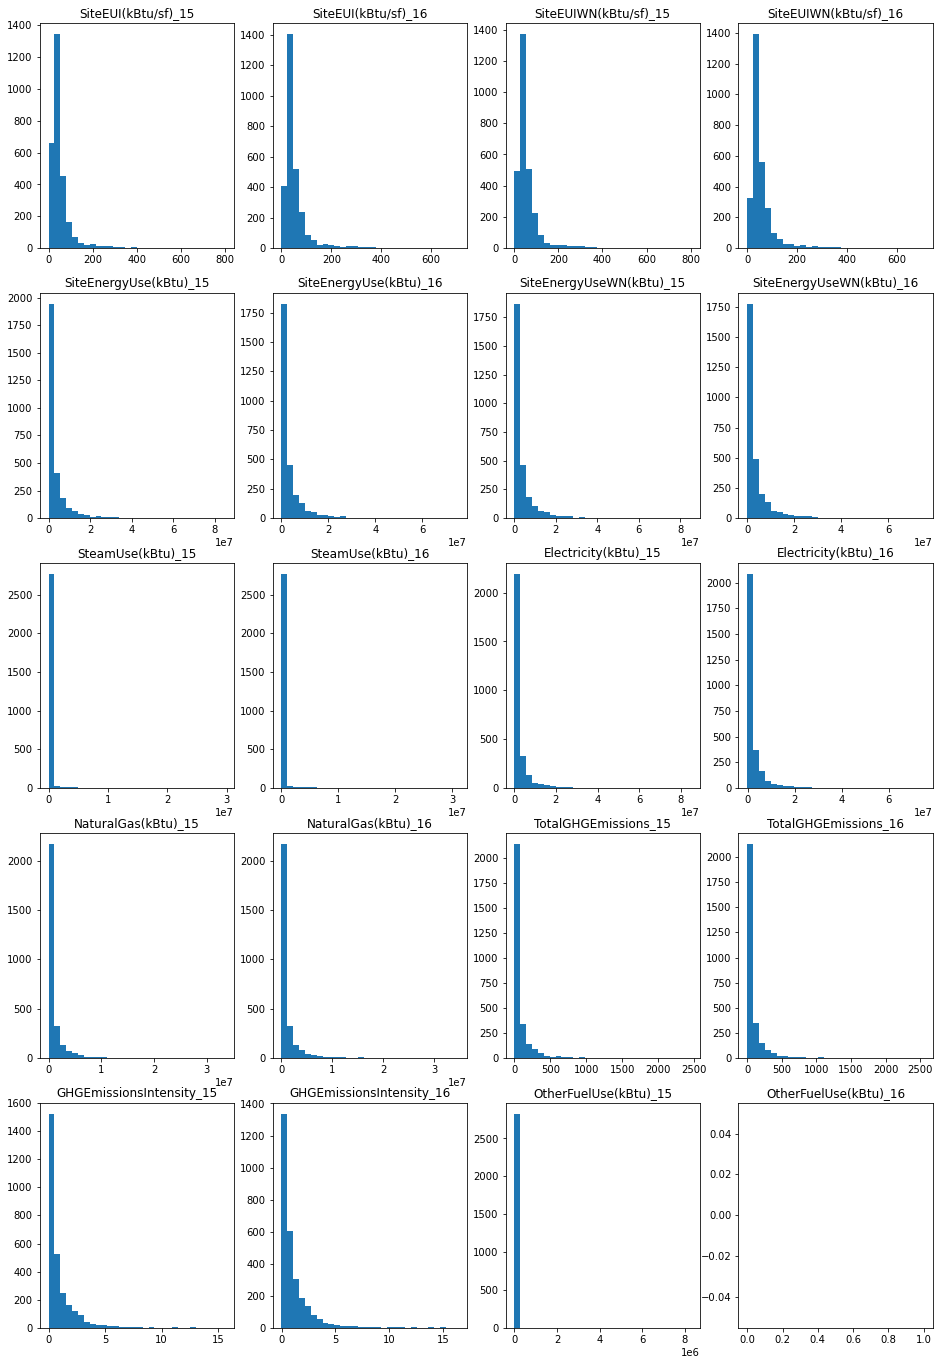

In [85]:
#On commence par gérer les outliers:
k=0
plt.figure(figsize=(16,24))
for i in nrj:
    k+=1
    i15=i+'_15'
    i16=i+'_16'
    plt.subplot(5,4,k)
    plt.hist(dupl[i15].dropna(how='any'),bins=30)
    plt.title(i15)
    k+=1
    plt.subplot(5,4,k)
    plt.hist(dupl[i16].dropna(how='any'),bins=30)
    plt.title(i16)
      

In [86]:
#On met à jour le dictionnaire des outliers:
outliers['SiteEUI(kBtu/sf)']=[0,400]
outliers['SiteEUIWN(kBtu/sf)']=[0,400]
outliers['SourceEUI(kBtu/sf)']=[0,700]
outliers['SourceEUIWN(kBtu/sf)']=[0,700]
outliers['SiteEnergyUse(kBtu)']=[0,50000000]
outliers['SiteEnergyUseWN(kBtu)']=[0,50000000]
outliers['SteamUse(kBtu)']=[0,32000000]
outliers['Electricity(kBtu)']=[0,15000000]
outliers['NaturalGas(kBtu)']=[0,7000000]
outliers['TotalGHGEmissions']=[0,1000]
outliers['GHGEmissionsIntensity']=[0,8]
outliers['OtherFuelUse(kBtu)']=[0,5000000]

In [87]:
#On supprime les outliers:
print(dupl.shape)
for i in nrj:
    i15=i+'_15'
    i16=i+'_16'
    print(i)
    dupl=dupl[-(dupl[i15]>outliers[i][1])]
    dupl=dupl[-(dupl[i16]>outliers[i][1])]   
    dupl=dupl[-(dupl[i15]<outliers[i][0])]
    dupl=dupl[-(dupl[i16]<outliers[i][0])]
    print(dupl.shape)

(2835, 45)
SiteEUI(kBtu/sf)
(2828, 45)
SiteEUIWN(kBtu/sf)
(2828, 45)
SiteEnergyUse(kBtu)
(2820, 45)
SiteEnergyUseWN(kBtu)
(2819, 45)
SteamUse(kBtu)
(2819, 45)
Electricity(kBtu)
(2753, 45)
NaturalGas(kBtu)
(2706, 45)
TotalGHGEmissions
(2704, 45)
GHGEmissionsIntensity
(2696, 45)
OtherFuelUse(kBtu)
(2694, 45)


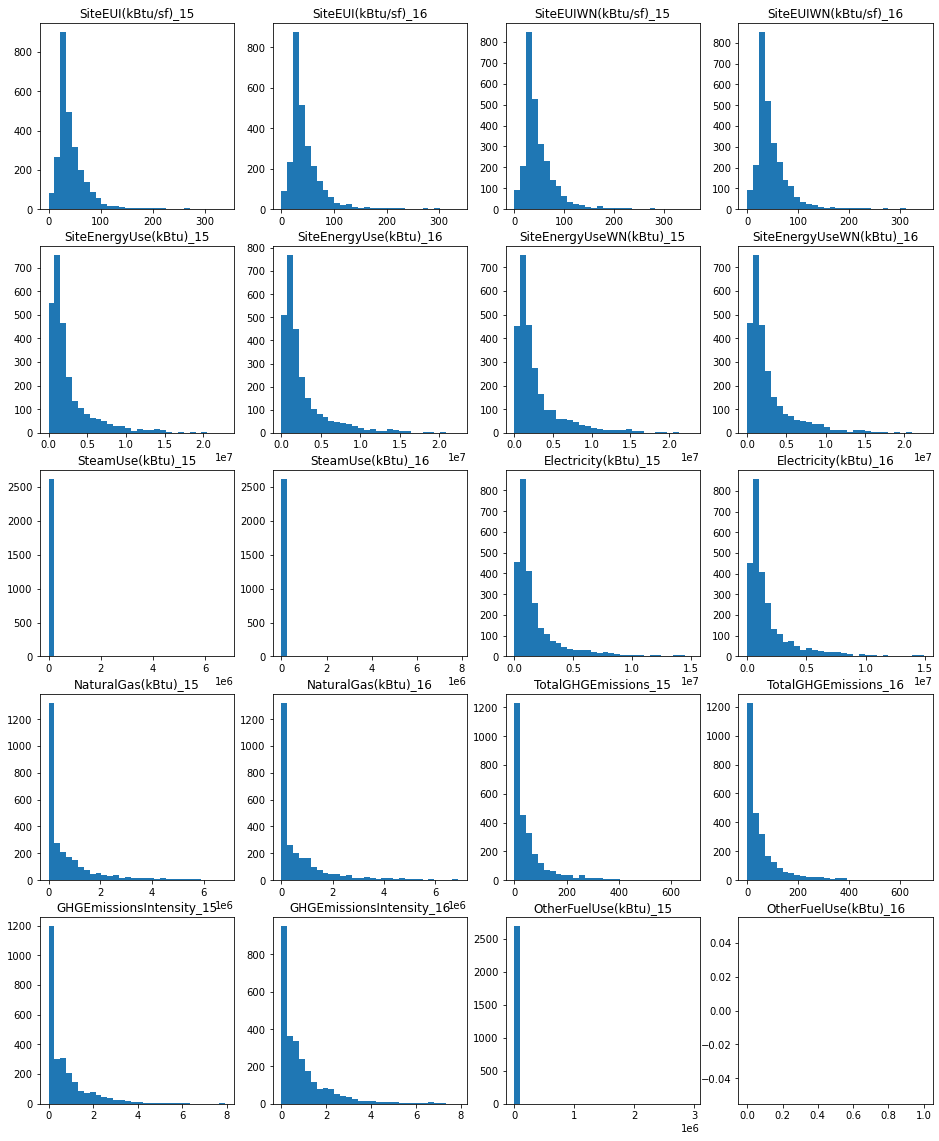

In [88]:
#On affine:
k=0
plt.figure(figsize=(16,24))
for i in nrj:
    k+=1
    i15=i+'_15'
    i16=i+'_16'
    plt.subplot(6,4,k)
    plt.hist(dupl[i15].dropna(how='any'),bins=30)
    plt.title(i15)
    k+=1
    plt.subplot(6,4,k)
    plt.hist(dupl[i16].dropna(how='any'),bins=30)
    plt.title(i16)

In [89]:
#On regarde l'aspect WeatherNormalized entre 2015 et 2016:
WN=dupl[['SiteEUI(kBtu/sf)_15',
 'SiteEUI(kBtu/sf)_16',
 'SiteEUIWN(kBtu/sf)_15',
 'SiteEUIWN(kBtu/sf)_16',
 'SiteEnergyUse(kBtu)_15',
 'SiteEnergyUse(kBtu)_16',
 'SiteEnergyUseWN(kBtu)_15',
 'SiteEnergyUseWN(kBtu)_16']].copy()
WN['SiteEUI_15']=WN['SiteEUIWN(kBtu/sf)_15']/WN['SiteEUI(kBtu/sf)_15']
WN['SiteEnergyUse_15']=WN['SiteEnergyUseWN(kBtu)_15']/WN['SiteEnergyUse(kBtu)_15']
WN['SiteEUI_16']=WN['SiteEUIWN(kBtu/sf)_16']/WN['SiteEUI(kBtu/sf)_16']
WN['SiteEnergyUse_16']=WN['SiteEnergyUseWN(kBtu)_16']/WN['SiteEnergyUse(kBtu)_16']
WN.describe()

,SiteEUI(kBtu/sf)_15,SiteEUI(kBtu/sf)_16,SiteEUIWN(kBtu/sf)_15,SiteEUIWN(kBtu/sf)_16,SiteEnergyUse(kBtu)_15,SiteEnergyUse(kBtu)_16,SiteEnergyUseWN(kBtu)_15,SiteEnergyUseWN(kBtu)_16,SiteEUI_15,SiteEnergyUse_15,SiteEUI_16,SiteEnergyUse_16
count,2694.000000,2693.000000,2694.000000,2693.000000,2.694000e+03,2.694000e+03,2.694000e+03,2.693000e+03,2692.000000,2692.000000,2678.000000,2678.000000
mean,46.626466,47.083401,50.504751,49.535982,2.690850e+06,2.711115e+06,2.888855e+06,2.836437e+06,1.090191,1.090222,1.057231,1.057130
std,36.510262,36.677688,38.238746,37.778333,2.989245e+06,3.004935e+06,3.130332e+06,3.096191e+06,0.092424,0.092404,0.059451,0.059259
min,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,26.800000,27.000000,29.200000,28.500000,8.528978e+05,8.617260e+05,9.265035e+05,9.100829e+05,1.034209,1.034131,1.030551,1.030474
50%,35.600000,36.200001,39.000000,38.299999,1.586836e+06,1.592976e+06,1.743868e+06,1.677474e+06,1.087300,1.087197,1.054604,1.054383
75%,54.400000,55.500000,60.375000,58.799999,3.117081e+06,3.199467e+06,3.448710e+06,3.372444e+06,1.131700,1.131477,1.079862,1.079892
max,338.300000,335.500000,354.400000,346.700012,2.281169e+07,2.232536e+07,2.281169e+07,2.252495e+07,1.378689,1.378868,1.323529,1.320628


In [90]:
#les conso sont un peu plus normalisées en 2015 qu'en 2016 mais ce n'est pas non plus énorme.
#On ne va donc se baser que sur les données non normalisées et on va prendre la moyenne entre 2015 et 2016

for i in nrj:
    i15=i+'_15'
    i16=i+'_16'
    #On prends éventuellement la valeur de l'autre année en cas de nan:
    dupl[i15]=np.where(dupl[i15]!=dupl[i15],dupl[i16],dupl[i15])
    dupl[i16]=np.where(dupl[i16]!=dupl[i16],dupl[i15],dupl[i16])
    #On conserve la moyenne des deux années
    dupl[i]=(dupl[i15]+dupl[i16])/2
    del dupl[i15]
    del dupl[i16]

### Les outliers

In [91]:
#On prends éventuellement la valeur de l'autre année en cas de nan:
dupl['Outlier_15']=np.where(dupl['Outlier_15']!=dupl['Outlier_15'],dupl['Outlier_16'],dupl['Outlier_15'])
dupl['Outlier_16']=np.where(dupl['Outlier_16']!=dupl['Outlier_16'],dupl['Outlier_15'],dupl['Outlier_16'])

In [92]:
a=dupl.dropna(subset=['Outlier_15'],how='all')
a[a['Outlier_15']!=a['Outlier_16']]

,OSEBuildingID,DataYear_15,DataYear_16,DefaultData_15,DefaultData_16,Outlier_15,Outlier_16,BuildingType,PropertyName,Latitude,...,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
380,539,2015,2016,Yes,False,Low Outlier,Low outlier,NonResidential,UNIVERSITY CENTER,47.661753,...,5.250000,5.250000,3.637379e+05,3.637379e+05,0.0,363746.5,0.0,2.535,0.025,0.0
708,19708,2015,2016,No,False,Low Outlier,Low outlier,Residential,BAY VISTA APARTMENTS,47.617079,...,17.250000,18.850000,2.395819e+06,2.613857e+06,0.0,2136605.0,259257.5,28.665,0.140,0.0
823,19934,2015,2016,No,False,Low Outlier,Low outlier,Residential,BELMONT LOFTS CONDOMINIUM,47.620593,...,9.550000,10.400000,2.522891e+05,2.751990e+05,0.0,252294.5,0.0,1.755,0.040,0.0
951,20367,2015,2016,No,False,Low Outlier,Low outlier,Residential,CITY LIGHTS ON HARBOR CONDOMINIUM,47.581694,...,10.150000,10.150000,7.231032e+05,7.231032e+05,0.0,723118.0,0.0,5.040,0.050,0.0
1213,21315,2015,2016,No,False,Low Outlier,Low outlier,NonResidential,1518 5TH AVE OFFICE,47.611249,...,1.400000,1.400000,3.402425e+04,3.402425e+04,0.0,34025.0,0.0,0.240,0.000,0.0
1323,21562,2015,2016,No,False,Low Outlier,Low outlier,Residential,DIPLOMAT CONDOMINIUM,47.563370,...,7.500000,8.100000,1.819290e+05,1.970698e+05,0.0,181932.5,0.0,1.270,0.025,0.0
1865,23708,2015,2016,No,False,Low Outlier,Low outlier,Residential,ANNE VISTA APTS,47.582304,...,7.850000,8.550000,1.583080e+05,1.720268e+05,0.0,158311.0,0.0,1.105,0.040,0.0
1923,23912,2015,2016,No,False,Low Outlier,Low outlier,NonResidential,DENSHO,47.599736,...,6.150000,6.650000,2.774307e+05,2.995025e+05,0.0,136424.5,141008.5,8.440,0.180,0.0
2329,25358,2015,2016,No,False,Low Outlier,Low outlier,Residential,ONE WEST CONDOMINIUM,47.557281,...,7.350000,8.250000,1.931633e+05,2.159174e+05,0.0,193166.5,0.0,1.345,0.035,0.0
2385,25553,2015,2016,Yes,False,Low Outlier,Low outlier,NonResidential,J & M HOTEL BUILDING,47.600522,...,19.700000,19.050000,5.006503e+05,4.840763e+05,0.0,500660.5,0.0,3.490,0.095,0.0


In [93]:
#Aucune différence, on garde une des deux:
dupl['Outlier']=dupl['Outlier_15']
del dupl['Outlier_15']
del dupl['Outlier_16']

In [94]:
#finalement on vire les DefaultData
#On vire aussi DataYear
#Mais on les garde en colonne pour concaténer avec le tableau des non dupliquées:
dupl['DataYear']=np.nan
dupl['DefaultData']=np.nan
dupl.drop(['DataYear_15', 'DataYear_16', 'DefaultData_15',
       'DefaultData_16'],axis=1,inplace=True)

### On recrée la base de donnée sans duplicats

In [95]:
A=dupl.columns
B=nondupl.columns
C=[]
for i in A:
    if i not in B:
        C.append(i)
for i in B:
    if i not in A:
        C.append(i)
C

[]

In [96]:
#On a bien les même
dupl=dupl[B]
data=pd.concat([dupl,nondupl])

In [97]:
data.shape

(2846, 32)

# Traitement de la base de donnée finale

In [98]:
#Traitement des données manquantes:
data.isnull().sum()

OSEBuildingID                         0
DataYear                           2694
BuildingType                          0
PropertyName                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes            85
LargestPropertyUseType                0
LargestPropertyUseTypeGFA            21
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA     117
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA       88
ENERGYSTARScore                     638
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        1


In [99]:
data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PropertyName', 'Latitude',
       'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)',
       'DefaultData', 'Outlier', 'TotalGHGEmissions', 'GHGEmissionsIntensity',
       'OtherFuelUse(kBtu)'],
      dtype='object')

In [100]:
data[data['LargestPropertyUseTypeGFA'].isnull()][['ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA']]

,ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
204,NaN,Other,NaN,None,NaN,None,NaN
406,NaN,Other,NaN,None,NaN,None,NaN
579,NaN,Other,NaN,None,NaN,None,NaN
593,NaN,Other,NaN,None,NaN,None,NaN
808,NaN,Other,NaN,None,NaN,None,NaN
901,NaN,Other,NaN,None,NaN,None,NaN
1147,Hotel,Other,NaN,None,NaN,None,NaN
1522,NaN,Other,NaN,None,NaN,None,NaN
1531,NaN,Other,NaN,None,NaN,None,NaN
1773,NaN,Other,NaN,None,NaN,None,NaN


In [101]:
#Je remplace les Nan de LargestPropertyUseTypeGFA par PropertyGFABuilding(s):
data['LargestPropertyUseTypeGFA']=np.where(data['LargestPropertyUseTypeGFA']!=data['LargestPropertyUseTypeGFA'],data['PropertyGFABuilding(s)'],data['LargestPropertyUseTypeGFA'])


In [102]:
data[data['SecondLargestPropertyUseTypeGFA'].isnull()]['SecondLargestPropertyUseType'].unique()

array(['None'], dtype=object)

In [103]:
data[data['ThirdLargestPropertyUseTypeGFA'].isnull()]['ThirdLargestPropertyUseType'].unique()

array(['None'], dtype=object)

In [104]:
#on rempli donc toutes les valeurs à 0:
data['SecondLargestPropertyUseTypeGFA']=data['SecondLargestPropertyUseTypeGFA'].fillna(0)
data['ThirdLargestPropertyUseTypeGFA']=data['ThirdLargestPropertyUseTypeGFA'].fillna(0)

In [105]:
data[data['SteamUse(kBtu)'].isnull()]

,OSEBuildingID,DataYear,BuildingType,PropertyName,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,OtherFuelUse(kBtu)
3348,50082,2016.0,Residential,STREAM FIFTEEN,47.6244,-122.313,2015,1.0,4.0,36685.0,...,820220.125,857612.6875,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [106]:
#on supprime cette ligne:
data=data[-data['SteamUse(kBtu)'].isnull()]

In [107]:
data.isnull().sum()

OSEBuildingID                         0
DataYear                           2694
BuildingType                          0
PropertyName                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     0
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes            84
LargestPropertyUseType                0
LargestPropertyUseTypeGFA             0
SecondLargestPropertyUseType          0
SecondLargestPropertyUseTypeGFA       0
ThirdLargestPropertyUseType           0
ThirdLargestPropertyUseTypeGFA        0
ENERGYSTARScore                     637
SiteEUI(kBtu/sf)                      0
SiteEUIWN(kBtu/sf)                    0
SiteEnergyUse(kBtu)                   0
SiteEnergyUseWN(kBtu)                 0
SteamUse(kBtu)                        0


In [108]:
#On impute des 0 dans Fuel:
data['OtherFuelUse(kBtu)']=data['OtherFuelUse(kBtu)'].fillna(0)

### Nettoyage et gestion des outliers

In [109]:
#On supprime les colonnes inutiles: 'PropertyName','ListOfAllPropertyUseTypes','DefaultData' et ou les informations clairement corrélées:
data.drop(['PropertyName','ListOfAllPropertyUseTypes','DefaultData','SiteEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','GHGEmissionsIntensity','SiteEUI(kBtu/sf)'],axis=1,inplace=True)

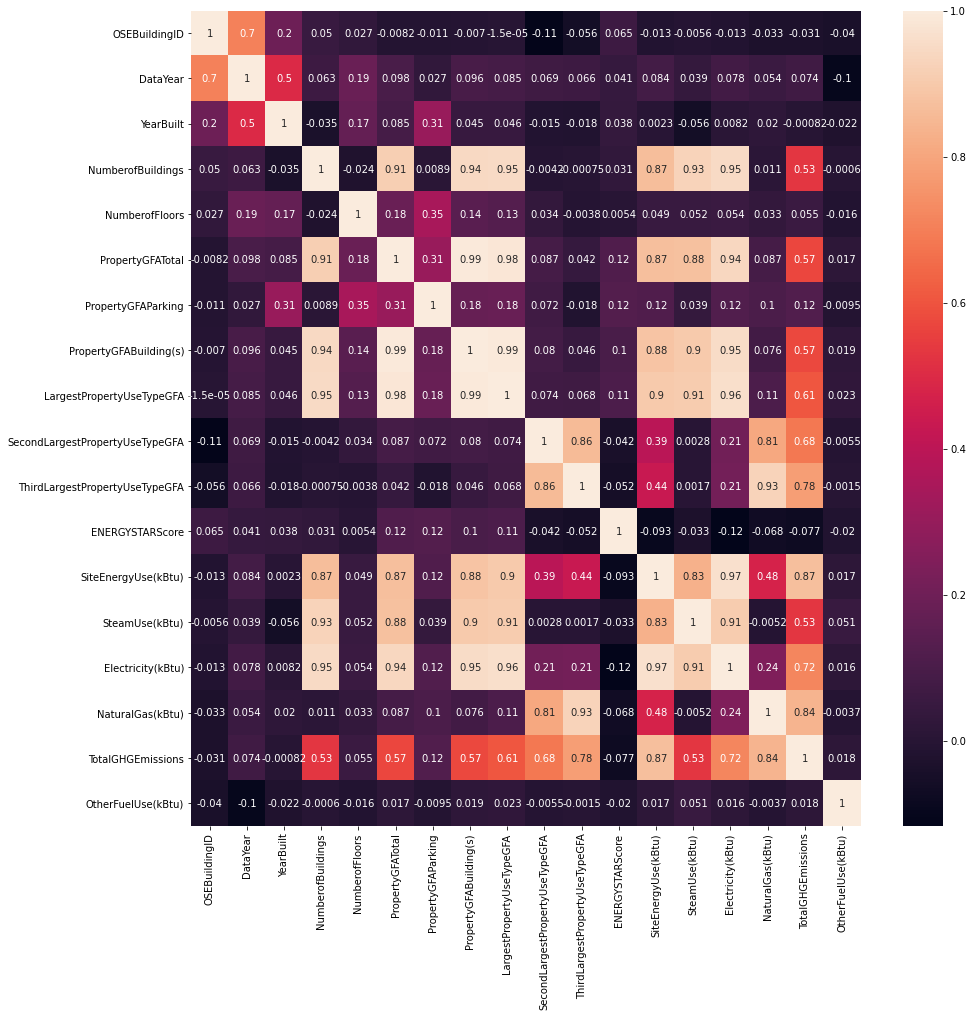

In [110]:
import seaborn as sn

corrMatrix = data.corr()

plt.figure(figsize=(15,15))
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [111]:
string=['BuildingType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
number=['Latitude', 'Longitude','YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',\
        'PropertyGFAParking', 'PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA',\
       'ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','SteamUse(kBtu)','Electricity(kBtu)','OtherFuelUse(kBtu)',\
        'NaturalGas(kBtu)','SiteEnergyUse(kBtu)','TotalGHGEmissions']

In [112]:
data['Latitude']=data['Latitude'].astype(float)
data['Longitude']=data['Longitude'].astype(float)

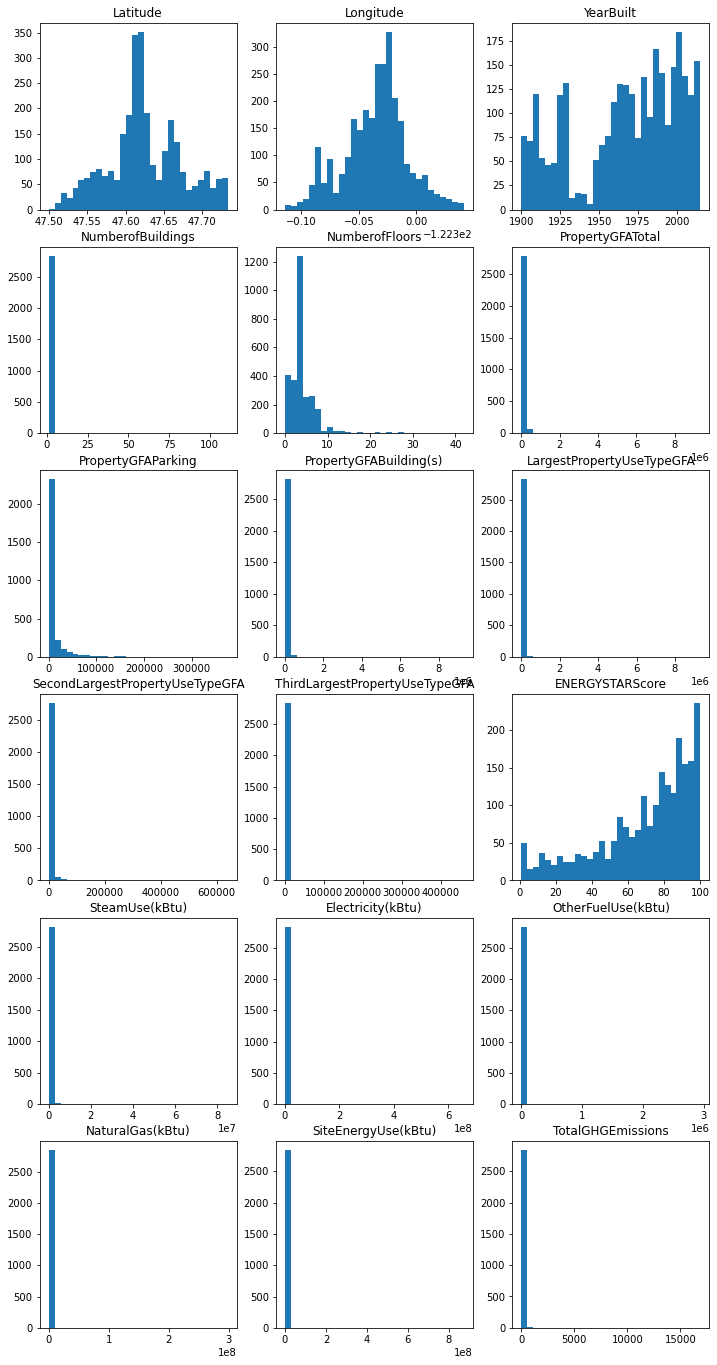

In [113]:
#On commence par gérer les outliers:
k=0
plt.figure(figsize=(12,24))
for i in number:
    k+=1
    plt.subplot(6,3,k)
    plt.hist(data[i].dropna(how='any'),bins=30)
    plt.title(i)
    

In [114]:
data.describe()

,OSEBuildingID,DataYear,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,OtherFuelUse(kBtu)
count,2845.000000,151.000000,2845.000000,2845.000000,2845.000000,2845.000000,2845.000000,2.845000e+03,2845.000000,2.845000e+03,2.845000e+03,2845.000000,2845.000000,2208.000000,2.845000e+03,2.845000e+03,2.845000e+03,2.845000e+03,2845.000000,2.845000e+03
mean,21754.746221,2015.615894,47.625110,-122.335348,1967.650264,1.048858,4.111424,7.458119e+04,9406.350264,6.517484e+04,6.009449e+04,3097.971863,519.061213,69.537591,3.332331e+06,9.866819e+04,2.289573e+06,8.891741e+05,70.801262,1.435833e+03
std,11638.635943,0.488002,0.048421,0.027455,33.681531,2.071864,3.425399,1.899249e+05,25333.357165,1.837488e+05,1.831879e+05,14300.574926,8778.866190,26.103250,1.889030e+07,1.705383e+06,1.293172e+07,5.895063e+06,397.739041,5.633128e+04
min,1.000000,2015.000000,47.499250,-122.414123,1900.000000,1.000000,0.000000,1.128500e+04,0.000000,1.092500e+04,6.455000e+03,0.000000,0.000000,1.000000,1.340900e+04,0.000000e+00,8.359000e+03,0.000000e+00,0.090000,0.000000e+00
25%,20212.000000,2015.000000,47.599736,-122.351816,1945.000000,1.000000,2.000000,2.814200e+04,0.000000,2.637300e+04,2.428800e+04,0.000000,0.000000,55.000000,8.586568e+05,0.000000e+00,6.101325e+05,0.000000e+00,8.420000,0.000000e+00
50%,23300.000000,2016.000000,47.619860,-122.332566,1974.000000,1.000000,4.000000,4.233100e+04,0.000000,3.996000e+04,3.675100e+04,0.000000,0.000000,77.000000,1.607766e+06,0.000000e+00,1.047564e+06,2.713465e+05,28.440000,0.000000e+00
75%,26037.000000,2016.000000,47.658952,-122.319136,1997.000000,1.000000,5.000000,7.881400e+04,6900.000000,6.949000e+04,6.389600e+04,1470.000000,0.000000,90.000000,3.268488e+06,0.000000e+00,2.206100e+06,9.997205e+05,70.710000,0.000000e+00
max,50226.000000,2016.000000,47.733840,-122.258729,2015.000000,111.000000,42.000000,9.320156e+06,376000.000000,9.320156e+06,9.320156e+06,639931.000000,459748.000000,100.000000,8.739237e+08,8.498524e+07,6.570744e+08,2.979090e+08,16870.980000,2.944419e+06


In [115]:
for i in number:
    print(data[i].unique())

[47.61219512 47.61313792 47.61633445 ... 47.63644    47.52832
 47.53939   ]
[-122.33799372 -122.33364378 -122.33666716 ... -122.35784    -122.32431
 -122.29536   ]
[1927 1996 1999 1926 1904 1910 1969 1928 1980 1930 1907 1961 2001 1991
 1955 1978 1949 1989 1906 1994 1990 1950 1900 1954 1911 1973 1920 1985
 1908 1959 2000 1997 1998 1962 2008 1983 1929 2010 1970 2002 1923 2003
 1957 1964 1941 1963 2006 1915 1958 2009 2011 2007 1965 1952 1960 1937
 1966 2004 1968 1925 1924 2005 1909 1972 1914 1913 1917 1981 1916 1947
 1956 1977 1921 1984 1986 1988 1945 1979 1974 1982 1971 1967 1987 1940
 1976 1948 1938 1922 1953 1993 1912 1918 1905 1951 1931 1902 1975 1939
 1944 1992 1995 1946 1942 1903 2012 2013 1901 1919 2014 1932 1936 1935
 2015]
[  1.   3.   2.   6.   5.   7. 111.]
[12. 11.  2.  8. 15.  6.  9. 33.  5.  7.  1.  3.  4. 24. 10. 17. 20. 22.
 14. 13.  0. 19. 26. 27. 16. 23. 37. 42. 25. 21. 18. 41.]
[ 88434. 103566.  97288. ...  13157.  14101.  18258.]
[0.000000e+00 1.506400e+04 3.719800e+04

In [116]:
outliers

{'PropertyGFATotal': [0, 800000],
 'PropertyGFAParking': [0, 250000],
 'PropertyGFABuilding(s)': [0, 600000],
 'LargestPropertyUseTypeGFA': [0, 600000],
 'SecondLargestPropertyUseTypeGFA': [0, 100000],
 'ThirdLargestPropertyUseTypeGFA': [0, 30000],
 'SiteEUI(kBtu/sf)': [0, 400],
 'SiteEUIWN(kBtu/sf)': [0, 400],
 'SourceEUI(kBtu/sf)': [0, 700],
 'SourceEUIWN(kBtu/sf)': [0, 700],
 'SiteEnergyUse(kBtu)': [0, 50000000],
 'SiteEnergyUseWN(kBtu)': [0, 50000000],
 'SteamUse(kBtu)': [0, 32000000],
 'Electricity(kBtu)': [0, 15000000],
 'NaturalGas(kBtu)': [0, 7000000],
 'TotalGHGEmissions': [0, 1000],
 'GHGEmissionsIntensity': [0, 8],
 'OtherFuelUse(kBtu)': [0, 5000000]}

In [117]:
outliers['NumberofBuildings']=[1,10]
outliers['NumberofFloors']=[1,30]
outliers['Latitude']=[47,48]
outliers['Longitude']=[-123,-122]
outliers['ENERGYSTARScore']=[0,100]
outliers['YearBuilt']=[1900,2016]
outliers['PropertyGFATotal']=[1, 550000]
outliers['PropertyGFAParking']=[0, 150000]
outliers['PropertyGFABuilding(s)']=[1, 400000]
outliers['LargestPropertyUseTypeGFA']=[0, 400000]
outliers['SecondLargestPropertyUseTypeGFA']=[0, 60000]
outliers['ThirdLargestPropertyUseTypeGFA']=[0, 15000]
outliers['TotalGHGEmissions']=[0, 450]
outliers['SiteEnergyUse(kBtu)']=[0, 20000000]
outliers['NaturalGas(kBtu)']=[0, 7000000]
#On supprime les outliers:
print(data.shape)
for i in number:
    data=data[-(data[i]>outliers[i][1])]
    data=data[-(data[i]>outliers[i][1])]   
    data=data[-(data[i]<outliers[i][0])]
    data=data[-(data[i]<outliers[i][0])]
    print(i,data.shape)

(2845, 25)
Latitude (2845, 25)
Longitude (2845, 25)
YearBuilt (2845, 25)
NumberofBuildings (2844, 25)
NumberofFloors (2833, 25)
PropertyGFATotal (2827, 25)
PropertyGFAParking (2808, 25)
PropertyGFABuilding(s) (2805, 25)
LargestPropertyUseTypeGFA (2804, 25)
SecondLargestPropertyUseTypeGFA (2795, 25)
ThirdLargestPropertyUseTypeGFA (2790, 25)
ENERGYSTARScore (2790, 25)
SteamUse(kBtu) (2790, 25)
Electricity(kBtu) (2786, 25)
OtherFuelUse(kBtu) (2786, 25)
NaturalGas(kBtu) (2785, 25)
SiteEnergyUse(kBtu) (2784, 25)
TotalGHGEmissions (2779, 25)


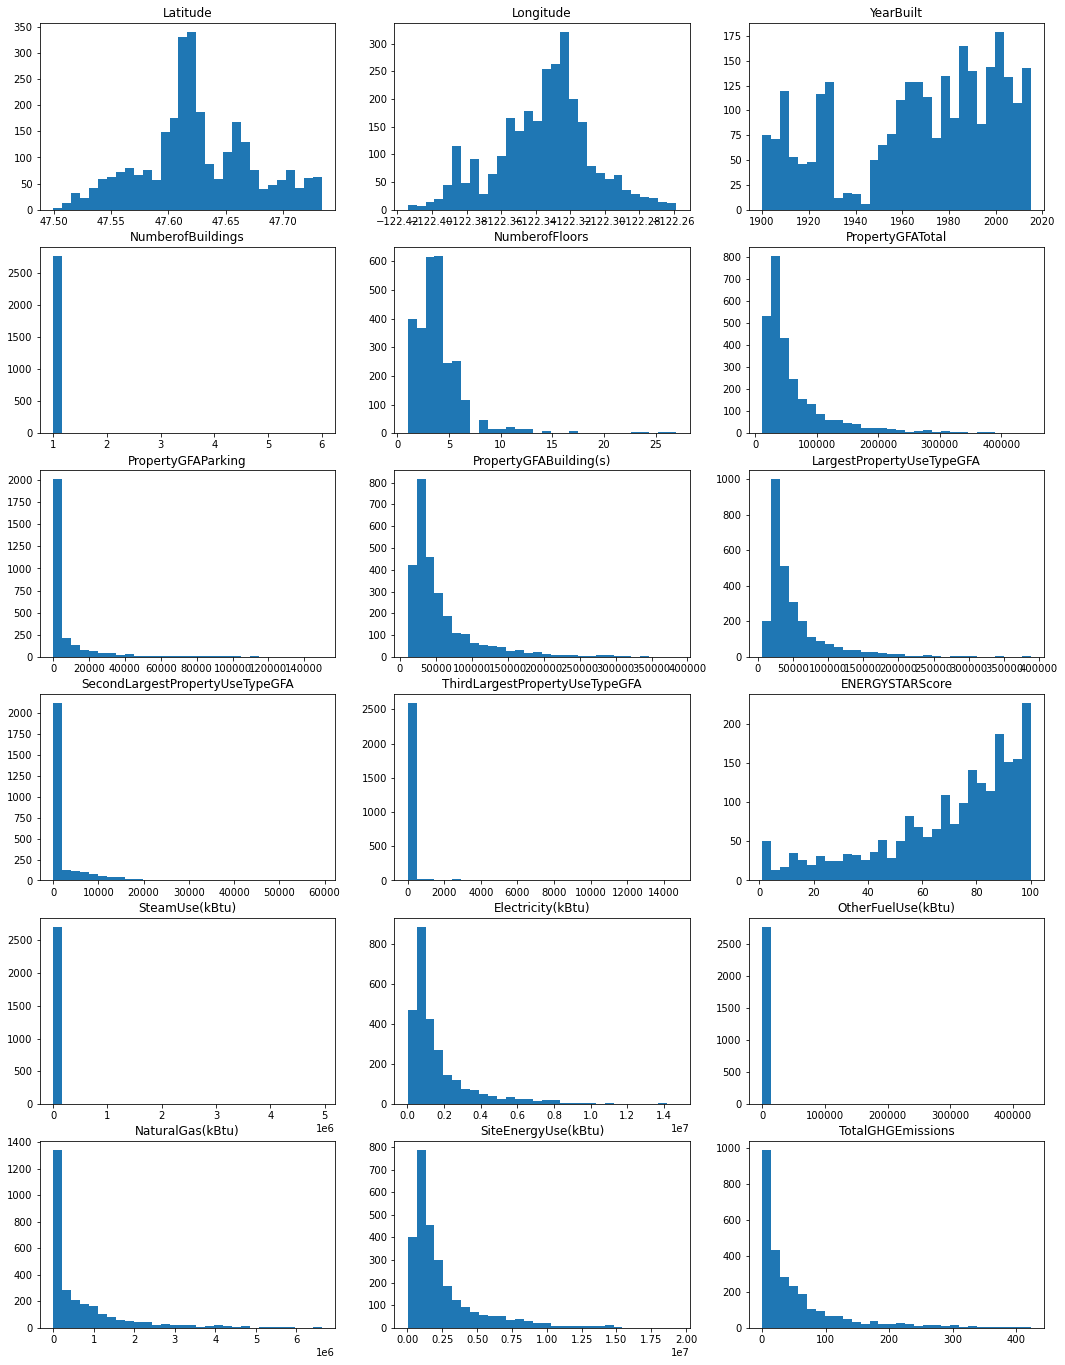

In [118]:
k=0
plt.figure(figsize=(18,24))
for i in number:
    k+=1
    plt.subplot(6,3,k)
    plt.hist(data[i].dropna(how='any'),bins=30)
    plt.title(i)

In [119]:
data[-data['Outlier'].isnull()].shape

(65, 25)

In [120]:
#sur les 2800 restant il y a 66 éléments considérés comme outliers, je les supprime
data=data[data['Outlier'].isnull()]

In [121]:
del data['Outlier']
del data['DataYear']

### Traitement des données énergétiques:

In [122]:
#on va regarder si SiteEnergyUse colle avec Steam+Electricity+NaturalGas+OtherFuelUse
copie=data.copy()
copie['checknrj']=(copie['SteamUse(kBtu)']+copie['Electricity(kBtu)']+copie['NaturalGas(kBtu)']+copie['OtherFuelUse(kBtu)'])/copie['SiteEnergyUse(kBtu)']
print(copie[copie['checknrj']<0.9].shape,'<90%', 'et' ,copie[copie['checknrj']>1.1].shape,'>110%')

(6, 24) <90% et (16, 24) >110%


In [123]:
#On supprime ces 18 données:
data=data[(data['SteamUse(kBtu)']+data['Electricity(kBtu)']+data['NaturalGas(kBtu)']+data['OtherFuelUse(kBtu)'])\
          /data['SiteEnergyUse(kBtu)']>=0.9]
data=data[(data['SteamUse(kBtu)']+data['Electricity(kBtu)']+data['NaturalGas(kBtu)']+data['OtherFuelUse(kBtu)'])\
          /data['SiteEnergyUse(kBtu)']<=1.1]
data.shape

(2692, 23)

In [124]:
#On crée une fonction qui transforme les lignes en portion de l'énergie utilisée comme proportion de la somme des 4:
def energies(row):
    total=row['SteamUse(kBtu)']+row['Electricity(kBtu)']+row['NaturalGas(kBtu)']+row['OtherFuelUse(kBtu)']
    row['SteamUse(kBtu)']=row['SteamUse(kBtu)']/total
    row['Electricity(kBtu)']=row['Electricity(kBtu)']/total
    row['NaturalGas(kBtu)']=row['NaturalGas(kBtu)']/total
    row['OtherFuelUse(kBtu)']=row['OtherFuelUse(kBtu)']/total
    return row

In [125]:
data=data.apply(lambda row: energies(row), axis=1)

In [126]:
#On supprime 'Steam' car les données sont liées: Elec+Steam+fuel+gas=1
del data['SteamUse(kBtu)']

In [127]:
data[['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,88434.0,0.0,0.0
1,83880.0,4622.0,0.0
5,88830.0,0.0,0.0
6,81352.0,0.0,0.0
7,102761.0,0.0,0.0
...,...,...,...
3371,12294.0,0.0,0.0
3372,16000.0,0.0,0.0
3373,7583.0,5574.0,0.0
3374,6601.0,6501.0,484.0


### Traitement des surfaces:

In [128]:
#On connait la surface totale du batiment
#On sait que surface parking+surface building=surface totale
#Donc surface totale ne nous sert à rien (les 3 sont liés)
del data['PropertyGFATotal']

In [129]:
print(data['LargestPropertyUseType'].unique(),data['SecondLargestPropertyUseType'].unique(),data['ThirdLargestPropertyUseType'].unique())

['Other' 'Middle'] ['None' 'Middle' 'Other' 'High'] ['None' 'Other' 'Middle' 'High']


In [130]:
data[data['SecondLargestPropertyUseType']=='High'][['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
104,Other,High,None,92300.0,4944.0,0.0
226,Other,High,None,182540.0,240.0,0.0
328,Middle,High,None,54880.0,320.0,0.0
367,Other,High,None,152579.0,7500.0,0.0
406,Other,High,None,50235.0,2875.0,0.0
463,Other,High,None,184119.0,406.0,0.0
483,Other,High,Other,51733.0,11999.0,9851.0
581,Other,High,None,101278.0,502.0,0.0
1313,Other,High,None,54150.0,650.0,0.0


In [131]:
data[data['ThirdLargestPropertyUseType']=='High'][['LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]

,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
518,Other,Other,High,110694.5,20101.0,634.0
1247,Other,Other,High,18380.0,6060.0,3304.0


In [132]:
#On a donc 3 possibilité de batiment: consommation haute, moyenne ou normale
#On va transformer les 6 colonnes 'LargestPropertyUseType','LargestPropertyUseTypeGFA',...
#En trois colonnes:
#'LargestPropertyUseType' va devenir la portion du batiment en High
#'SecondLargestPropertyUseType' va devenir la portion du batiment en Middle
#'ThirdLargestPropertyUseType' va devenir la portion du batiment en Other
def surface(row):
    high=0
    middle=0
    other=0
    total=row['LargestPropertyUseTypeGFA']+row['SecondLargestPropertyUseTypeGFA']+row['ThirdLargestPropertyUseTypeGFA']
    if row['LargestPropertyUseType']=='High':
        high+=row['LargestPropertyUseTypeGFA']
    elif row['LargestPropertyUseType']=='Middle':
        middle+=row['LargestPropertyUseTypeGFA']
    elif row['LargestPropertyUseType']=='Other':
        other+=row['LargestPropertyUseTypeGFA']
    if row['SecondLargestPropertyUseType']=='High':
        high+=row['SecondLargestPropertyUseTypeGFA']
    elif row['SecondLargestPropertyUseType']=='Middle':
        middle+=row['SecondLargestPropertyUseTypeGFA']
    elif row['SecondLargestPropertyUseType']=='Other':
        other+=row['SecondLargestPropertyUseTypeGFA']
    if row['ThirdLargestPropertyUseType']=='High':
        high+=row['ThirdLargestPropertyUseTypeGFA']
    elif row['ThirdLargestPropertyUseType']=='Middle':
        middle+=row['ThirdLargestPropertyUseTypeGFA']
    elif row['ThirdLargestPropertyUseType']=='Other':
        other+=row['ThirdLargestPropertyUseTypeGFA']
    row['LargestPropertyUseType']=high
    row['SecondLargestPropertyUseType']=middle
    row['ThirdLargestPropertyUseType']=other
    return row



In [133]:
data=data.apply(lambda row: surface(row),axis=1)

# Normalisation des données:

In [134]:
#Je crée un dictionnaire pour retrouver et conserver les fonctions appliquées:
fonctions={}

In [135]:
#On a plus besoin de:'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'
data.drop(['LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'],axis=1,inplace=True)

#OSEBuilding on garde au cas ou et on le mettra sur les y 
#pour retrouver éventuellement les batiments dans la base de donnée

#BuildingType on va mettre des 1 en Residentiel et des O en non résidentiel:
data['BuildingType']=np.where(data['BuildingType']=='NonResidential',1,0)



In [136]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'OtherFuelUse(kBtu)'],
      dtype='object')

Text(0.5, 1.0, 'Longitude')

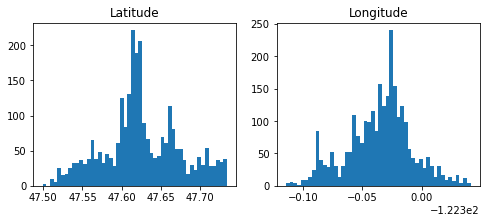

In [137]:
#On regarde les données non catégorielles:
#On regarde Latitude et Longitude:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(data['Latitude'].dropna(how='any'),bins=50)
plt.title('Latitude')
plt.subplot(122)
plt.hist(data['Longitude'].dropna(how='any'),bins=50)
plt.title('Longitude')

In [138]:
#C'est à peu près une distribution normale, on garde tel quel

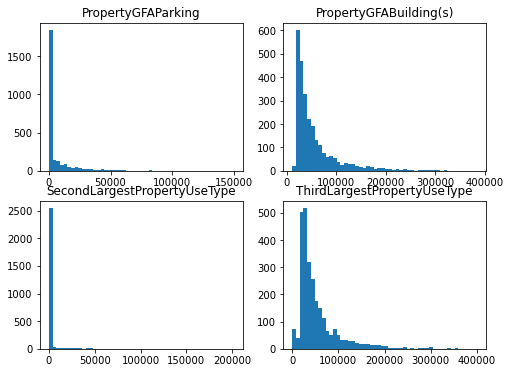

In [139]:
# 'PropertyGFAParking' et 'PropertyGFABuilding(s)'
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.hist(data['PropertyGFAParking'].dropna(how='any'),bins=50)
plt.title('PropertyGFAParking')
plt.subplot(222)
plt.hist(data['PropertyGFABuilding(s)'],bins=50)
plt.title('PropertyGFABuilding(s)')
plt.subplot(223)
plt.hist(data['SecondLargestPropertyUseType'],bins=50)
plt.title('SecondLargestPropertyUseType')
plt.subplot(224)
plt.hist(data['ThirdLargestPropertyUseType'],bins=50)
plt.title('ThirdLargestPropertyUseType')
plt.show()

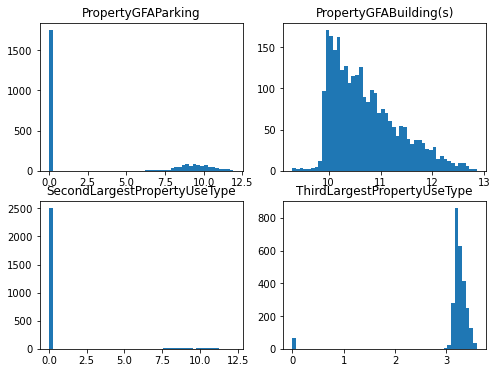

In [140]:
# 'PropertyGFAParking' et 'PropertyGFABuilding(s)'
plt.figure(figsize=(8,6))
plt.subplot(221)
plt.hist(np.log(1+data['PropertyGFAParking']),bins=50)
plt.title('PropertyGFAParking')
plt.subplot(222)
plt.hist(np.log(data['PropertyGFABuilding(s)']),bins=50)
plt.title('PropertyGFABuilding(s)')
plt.subplot(223)
plt.hist(np.log(1+data['SecondLargestPropertyUseType']),bins=50)
plt.title('SecondLargestPropertyUseType')
plt.subplot(224)
plt.hist(np.log(1+data['ThirdLargestPropertyUseType'])**(1/2),bins=50)
plt.title('ThirdLargestPropertyUseType')
plt.show()

In [141]:
fonctions['PropertyGFAParking']='log(1+x)'
fonctions['LargestPropertyUseType']='log(1+x)'
fonctions['SecondLargestPropertyUseType']='log(1+x)'
fonctions['ThirdLargestPropertyUseType']='racine(log(1+x))'

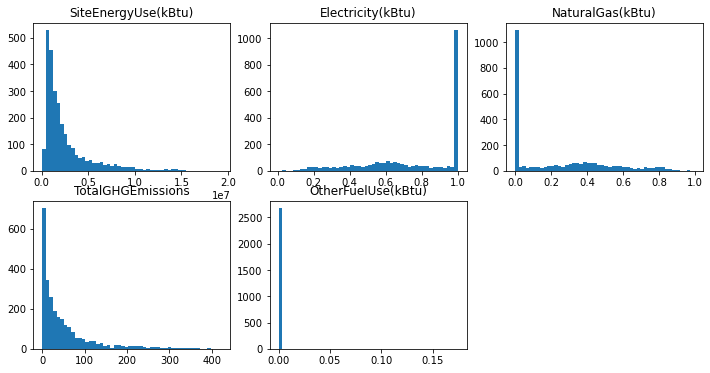

In [142]:
#'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)','Electricity(kBtu)', 
#'NaturalGas(kBtu)', 'TotalGHGEmissions','OtherFuelUse(kBtu)'
k=1
plt.figure(figsize=(12,6))
for i in ['SiteEnergyUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)', 'TotalGHGEmissions','OtherFuelUse(kBtu)']:
    plt.subplot(2,3,k)
    plt.hist(data[i],bins=50)
    plt.title(i)
    k+=1
plt.show()

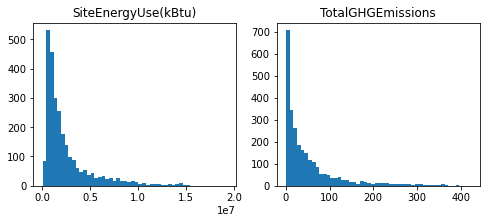

In [143]:

k=1
plt.figure(figsize=(8,3))
for i in ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']:
    plt.subplot(1,2,k)
    plt.hist(data[i],bins=50)
    plt.title(i)
    k+=1
plt.show()

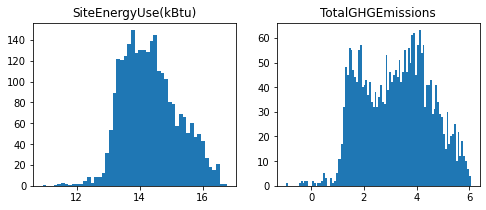

In [144]:
#Je passe au log SEU et GHG:
plt.figure(figsize=(8,3))
plt.subplot(121)
plt.hist(np.log(data['SiteEnergyUse(kBtu)']),bins=50)
plt.title('SiteEnergyUse(kBtu)')
plt.subplot(122)
plt.hist(np.log(data['TotalGHGEmissions']),bins=100)
plt.title('TotalGHGEmissions')
plt.show()

In [145]:
#C'est pas mal pour SEU:
fonctions['SiteEnergyUse(kBtu)']='log'

Text(0.5, 1.0, 'TotalGHGEmissions')

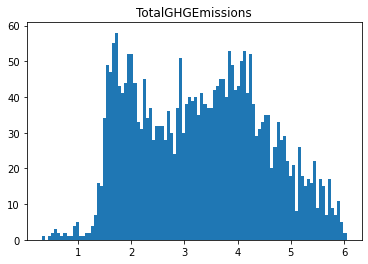

In [146]:
#J'essai en plus de passer à la racine pour GHG:
plt.hist(np.log(data['TotalGHGEmissions']+1),bins=100)
plt.title('TotalGHGEmissions')

In [147]:
#c'est mieux:
fonctions['TotalGHGEmissions']='log(1+x)'

In [149]:
fonctions

{'PropertyGFAParking': 'log(1+x)',
 'LargestPropertyUseType': 'log(1+x)',
 'SecondLargestPropertyUseType': 'log(1+x)',
 'ThirdLargestPropertyUseType': 'racine(log(1+x))',
 'SiteEnergyUse(kBtu)': 'log',
 'TotalGHGEmissions': 'log(1+x)'}

In [150]:
data.columns

Index(['OSEBuildingID', 'BuildingType', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseType',
       'SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)', 'TotalGHGEmissions', 'OtherFuelUse(kBtu)'],
      dtype='object')

In [151]:
#On effectue les changements:
data['PropertyGFABuilding(s)']=np.log(data['PropertyGFABuilding(s)'])
data['PropertyGFAParking']=np.log(1+data['PropertyGFAParking'])
data['LargestPropertyUseType']=np.log(1+data['LargestPropertyUseType'])
data['SecondLargestPropertyUseType']=np.log(1+data['SecondLargestPropertyUseType'])
data['ThirdLargestPropertyUseType']=np.log(1+data['ThirdLargestPropertyUseType'])**(1/2)
#Pour Energy et GHG on n'effectue pas encore les modif, on fera cela avant de lancer les modèles de régression
data.to_csv('cleaneddata.csv')